# Problem Statement

---



  COVID-19 adalah bencana global terbesar dalam beberapa dekade. Ratusan ribu nyawa telah
telah hilang, dan dampak terhadap ekonomi dunia kemungkinan menghadapi resesi terburuk sejak 1930-an. Hal ini
mengakibatkan hilangnya pekerjaan dan pendapatan akan menyebabkan kerusakan lebih lanjut pada mata pencaharian, kesehatan, dan pembangunan berkelanjutan.Dunia tidak bisa mengulangi bencana skala COVID-19, Kembali ke keadaan normal belumlah maksimal. Diperlukan evaluasi dari kejadian yang telah terjadi untuk persiapan jika suatu saat terjadi wabah yang sama atau lebih buruk. 

  Meninjau mobilitas/pergerakan di suatu negara, kita dapat mengetahui tren faktor sosial/ekonomi masyarakat di negara tersebut.Jakarta, yang menjadi pusat perekonomian berpengaruh pada faktor mobilitas warga indonesia. Untuk itu digunakan sampel data provinsi DKI Jakarta yang mewakilkan mobilitas masyarakat Indonesia.

  Menggunakan data yang telah disediakan, kami ingin mencari tahu keterhubungan antara dampak dari COVID-19 dengan mobilitas masyarakat di Jakarta, yang bertujuan untuk memprediksi mobilitas masyarakat sebagai bagian dari recovery COVID-19 di sektor mobilitas. Dari prediksi yang telah didapat, diharapkan dapat diambil langkah - langkah yang tepat untuk mempercepat proses pemulihan mobilitas Jakarta.

# Data Cleaning and Preprocessing
---


##Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow import keras
import datetime

Langkah awal, import package yang akan digunakan untuk keperluan proses awal hingga akhir data

## Import and Preprocessing Mobility Data

In [ ]:
mobility_2020_df = pd.read_csv('/content/2020_ID_Region_Mobility_Report.csv')
mobility_2021_df = pd.read_csv('/content/2021_ID_Region_Mobility_Report.csv')
mobility_2022_df = pd.read_csv('/content/2022_ID_Region_Mobility_Report.csv')

Load data yang berbentuk .csv berisi mobilitas report dari berbagai sektor di Indonesia dari tahun 2020 - 2022 

In [ ]:
mobility_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 11235 non-null  object 
 1   country_region                                      11235 non-null  object 
 2   sub_region_1                                        10914 non-null  object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     10914 non-null  object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            11235 non-null  object 
 8   date                                                11235 non-null  object 


Mengecek banyak baris dan kolom data mobilitas Indonesia tahun 2020, beserta tipe-tipe data tiap kolom. Diperoleh 11235 sampel dan 15 kolom pada dataset, serta terdapat 6 kolom bertipe kategorik dan 9 kolom bertipe numerik.

In [ ]:
mobility_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12775 entries, 0 to 12774
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 12775 non-null  object 
 1   country_region                                      12775 non-null  object 
 2   sub_region_1                                        12410 non-null  object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     12410 non-null  object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            12775 non-null  object 
 8   date                                                12775 non-null  object 


Mengecek banyak baris dan kolom data mobilitas Indonesia tahun 2021, beserta tipe-tipe data tiap kolom. Diperoleh 12775 sampel dan 15 kolom pada dataset, serta terdapat 6 kolom bertipe kategorik dan 9 kolom bertipe numerik.

In [ ]:
mobility_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5985 entries, 0 to 5984
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 5985 non-null   object 
 1   country_region                                      5985 non-null   object 
 2   sub_region_1                                        5814 non-null   object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     5814 non-null   object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            5985 non-null   object 
 8   date                                                5985 non-null   object 
 9

Mengecek banyak baris dan kolom data mobilitas Indonesia tahun 2022, beserta tipe-tipe data tiap kolom. Diperoleh 5985 sampel dan 15 kolom pada dataset, serta terdapat 6 kolom bertipe kategorik dan 9 kolom bertipe numerik.

In [ ]:
mobility_2022_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-01,3,24,46,-15.0,-49,6
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-02,11,35,28,-4.0,-4,3
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-03,14,36,20,-9.0,-10,4
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-04,11,33,15,-9.0,-8,4
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-05,12,34,17,-10.0,-7,4


Melihat 5 baris awal data mobilitas Indonesia tahun 2022

In [ ]:
mobility_2022_df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
5980,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-16,40,67,56,17.0,18,17
5981,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-17,23,55,32,0.0,22,20
5982,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-18,30,61,34,5.0,33,16
5983,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-19,18,51,20,-2.0,45,18
5984,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-20,39,69,67,15.0,11,17


Melihat 5 baris akhir data mobilitas Indonesia tahun 2022

In [ ]:
mobility_2022_df['sub_region_1'].unique()

array([nan, 'Aceh', 'Bali', 'Bangka Belitung Islands', 'Banten',
       'Bengkulu', 'Central Java', 'Central Kalimantan',
       'Central Sulawesi', 'East Java', 'East Kalimantan',
       'East Nusa Tenggara', 'Gorontalo', 'Jakarta', 'Jambi', 'Lampung',
       'Maluku', 'North Kalimantan', 'North Maluku', 'North Sulawesi',
       'North Sumatra', 'Papua', 'Riau', 'Riau Islands',
       'South East Sulawesi', 'South Kalimantan', 'South Sulawesi',
       'South Sumatra', 'Special Region of Yogyakarta', 'West Java',
       'West Kalimantan', 'West Nusa Tenggara', 'West Papua',
       'West Sulawesi', 'West Sumatra'], dtype=object)

Melihat nilai data kategorik dari kolom sub_region_1 untuk menemukan nilai 'Jakarta', dan dapat ditemukan nilai 'Jakarta' pada kolom tersebut. Karena kami hanya ingin meninjau mobilitas di daerah Jakarta, maka akan dilakukan slicing pada dataset mobilitas dengan hanya mengambil kolom sub_region_1 berupa satu nilai, yaitu Jakarta.

In [ ]:
jkt_mob_2022_df = mobility_2022_df.loc[mobility_2022_df['sub_region_1']=='Jakarta', :]
jkt_mob_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 2223 to 2393
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 171 non-null    object 
 1   country_region                                      171 non-null    object 
 2   sub_region_1                                        171 non-null    object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     171 non-null    object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            171 non-null    object 
 8   date                                                171 non-null    object 


Setelah mengetahui adanya nilai 'Jakarta' di kolom sub_region_1, dilakukan slicing sehingga terbentuk dataframe baru yang terdiri dari baris - baris dataset mobilitas tahun 2022 dengan syarat terdapat nilai 'Jakarta' dari kolom sub_region_1. Diperoleh dataframe mobilitas Jakarta tahun 2022 sebanyak 171 sampel.

In [ ]:
jkt_mob_2021_df = mobility_2021_df.loc[mobility_2021_df['sub_region_1']=='Jakarta', :]
jkt_mob_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 4745 to 5109
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 365 non-null    object 
 1   country_region                                      365 non-null    object 
 2   sub_region_1                                        365 non-null    object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     365 non-null    object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            365 non-null    object 
 8   date                                                365 non-null    object 


Dilakukan slicing sehingga terbentuk dataframe baru yang terdiri dari baris - baris dataset mobilitas tahun 2021 dengan syarat terdapat nilai 'Jakarta' dari kolom sub_region_1. Diperoleh dataframe mobilitas Jakarta tahun 2021 sebanyak 365 sampel.

In [ ]:
jkt_mob_2020_df = mobility_2020_df.loc[mobility_2020_df['sub_region_1']=='Jakarta', :]
jkt_mob_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 4173 to 4493
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 321 non-null    object 
 1   country_region                                      321 non-null    object 
 2   sub_region_1                                        321 non-null    object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     321 non-null    object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            321 non-null    object 
 8   date                                                321 non-null    object 


Dilakukan slicing sehingga terbentuk dataframe baru yang terdiri dari baris - baris dataset mobilitas tahun 2020 dengan syarat terdapat nilai 'Jakarta' dari kolom sub_region_1. Diperoleh dataframe mobilitas Jakarta tahun 2020 sebanyak 321 sampel.

In [ ]:
jkt_mob_2020_df.head(1)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4173,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-15,2.0,3.0,16.0,5.0,6,0


Mengecek baris awal dari dataframe baru, tujuannya adalah untuk mengetahui tanggal pada baris pertama, agar dapat dicocokan dengan tanggal pada baris pertama dari dataset yang lain. Hal ini berguna dalam proses Data Merging.

Pada dataset ini, diperoleh baris awal data berisikan tanggal 2020-02-15

In [ ]:
jkt_mob_2022_df.tail(1)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2393,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2022-06-20,-13,4,-4,-27.0,-13,8


Mengecek baris akhir dari dataframe baru, tujuannya adalah untuk mengetahui tanggal pada baris akhir, agar dapat dicocokan dengan tanggal pada baris akhir dari dataset yang lain. Hal ini berguna dalam proses Data Merging.

Pada dataset ini, diperoleh baris terakhir data berisikan tanggal 2022-06-20

In [ ]:
jkt_mob_df = pd.concat([jkt_mob_2020_df, jkt_mob_2021_df, jkt_mob_2022_df], ignore_index=True) # parameter ignore_index bernilai True untuk mereset index  
jkt_mob_df.drop(['country_region_code', 'country_region', 'sub_region_1',
                 'sub_region_2', 'metro_area', 'iso_3166_2_code', 
                 'census_fips_code', 'place_id'], axis=1, inplace=True) # lakukan drop kolom untuk menghilangkan kolom yang tidak digunakan
jkt_mob_df

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,2.0,3.0,16.0,5.0,6,0
1,2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
2,2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
3,2020-02-18,-1.0,1.0,-3.0,3.0,3,1
4,2020-02-19,-1.0,-3.0,-2.0,3.0,3,1
...,...,...,...,...,...,...,...
852,2022-06-16,-11.0,3.0,-1.0,-26.0,-13,8
853,2022-06-17,-9.0,4.0,5.0,-27.0,-11,9
854,2022-06-18,-10.0,7.0,8.0,-21.0,-5,5
855,2022-06-19,-10.0,4.0,3.0,-18.0,0,5


Dilakukan penggabungan 3 dataframe menjadi 1 dataframe secara vertikal, sedemikan sehingga terbentuk dataframe mobilitas di DKI jakarta dari tahun 2020 hingga 2022 secara berurutan.

Diperoleh dataframe jkt_mob_df yang berisi kolom - kolom berupa mobilitas yang hanya ada di daerah Jakarta dari berbagai sektor, dimulai dari tanggal 15 Februari 2020 hingga 20 Juni 2022.

In [ ]:
jkt_mob_df['date'] = pd.to_datetime(jkt_mob_df['date'])
jkt_mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                857 non-null    datetime64[ns]
 1   retail_and_recreation_percent_change_from_baseline  857 non-null    float64       
 2   grocery_and_pharmacy_percent_change_from_baseline   857 non-null    float64       
 3   parks_percent_change_from_baseline                  857 non-null    float64       
 4   transit_stations_percent_change_from_baseline       857 non-null    float64       
 5   workplaces_percent_change_from_baseline             857 non-null    int64         
 6   residential_percent_change_from_baseline            857 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 47.0 KB


Melakukan perubahan tipe data kolom date dari object menjadi datetime, untuk proses pemudahan visualisasi time series

## Import and Preprocessing Daily COVID-19 Data in Jakarta

In [ ]:
daily_jkt_df = pd.read_excel('/content/Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Data Jakarta')
daily_jkt_df.head()

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN


Load data yang berbentuk .excel pada sheet Data Jakarta yang berisi data harian COVID-19 di Jakarta, lalu ditampilkan 5 baris awal

In [ ]:
 daily_jkt_df.tail()

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
843,2022-06-22,NaN,NaN,15311,1238754,6276,503,1260844,1226,6779,362,0.0,15.0,6764.0
844,2022-06-23,NaN,NaN,15311,1239359,6714,514,1261898,1054,7228,605,0.0,34.0,7194.0
845,2022-06-24,NaN,NaN,15313,1240028,7301,522,1263164,1266,7823,669,0.0,56.0,7767.0
846,2022-06-25,NaN,NaN,15313,1240738,7596,562,1264209,1045,8158,710,0.0,43.0,8115.0
847,2022-06-26,NaN,NaN,15313,1241429,7931,591,1265264,1055,8522,691,0.0,41.0,8481.0


Menampilkan 5 baris akhir data harian COVID-19 Jakarta.

In [ ]:
daily_jkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          848 non-null    datetime64[ns]
 1   Jam              0 non-null      float64       
 2   Tanggal Jam      0 non-null      float64       
 3   Meninggal        848 non-null    int64         
 4   Sembuh           848 non-null    int64         
 5   Self Isolation   848 non-null    int64         
 6   Masih Perawatan  848 non-null    int64         
 7   Total Pasien     848 non-null    int64         
 8   Positif Harian   848 non-null    int64         
 9   Positif Aktif    848 non-null    int64         
 10  Sembuh Harian    848 non-null    int64         
 11  Tanpa Gejala     708 non-null    float64       
 12  Bergejala        708 non-null    float64       
 13  Belum Ada Data   708 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(8)

Mengecek banyak baris dan kolom data, beserta tipe-tipe data tiap kolom

In [ ]:
daily_jkt_df.drop(['Jam', 'Tanggal Jam', 'Self Isolation', 'Masih Perawatan', 
                   'Tanpa Gejala', 'Bergejala', 'Belum Ada Data'], axis=1, 
                  inplace=True) 

# parameter axis = 1 untuk menandakan drop dilakukan pada kolom dan inplace = true untuk menandai data di drop secara langsung

Melakukan drop kolom data untuk menghilangkan kolom-kolom yang tidak digunakan. Kolom Jam dan Tanggal Jam berisi nilai null. Kolom Self Isolation, Masih Perawatan, Tanpa Gejala, Bergejala, dan Belum Ada Data sudah dapat direpresentasikan oleh kolom Total Pasien. Sehingga kolom - kolom tersebut didrop. 

In [ ]:
array_meninggal = daily_jkt_df['Meninggal'].values

Dilakukan feature engineering, yaitu pembuatan kolom baru dengan nama 'Meninggal Harian'. Idenya adalah dengan mengubah kolom 'Meninggal' ke dalam bentuk array, lalu dengan operasi matematika yaitu jumlah 'Meninggal' di keesokan hari dikurangi 'Meninggal' di hari tersebut, menghasilkan nilai 'Meninggal Harian' pada hari tersebut

In [ ]:
list_meninggal_harian = [0] # membuat list awal meninggal harian adalah 0 pada hari pertama covid

In [ ]:
for i, j in zip(range(848), range(1, 848)): 
  list_meninggal_harian.append(array_meninggal[j] - array_meninggal[i])

list_meninggal_harian[:5] # display 5 nilai pada 5 index pertama

[0, 0, 1, 0, 2]

Dengan menggunakan looping, append operasi pengurangan array_meninggal pada index = i dikurangi array_meninggal pada index = i+1 ke dalam list_meninggal_harian

In [ ]:
daily_jkt_df['Meninggal Harian'] = list_meninggal_harian
daily_jkt_df # display dataframe baru

,Tanggal,Meninggal,Sembuh,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Meninggal Harian
0,2020-03-01,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0
2,2020-03-03,1,0,3,3,2,0,1
3,2020-03-04,1,0,3,0,2,0,0
4,2020-03-05,3,0,7,4,4,0,2
...,...,...,...,...,...,...,...,...
843,2022-06-22,15311,1238754,1260844,1226,6779,362,0
844,2022-06-23,15311,1239359,1261898,1054,7228,605,0
845,2022-06-24,15313,1240028,1263164,1266,7823,669,2
846,2022-06-25,15313,1240738,1264209,1045,8158,710,0


Masukkan list_meninggal_harian ke dalam dataframe, dengan label kolom Meninggal Harian

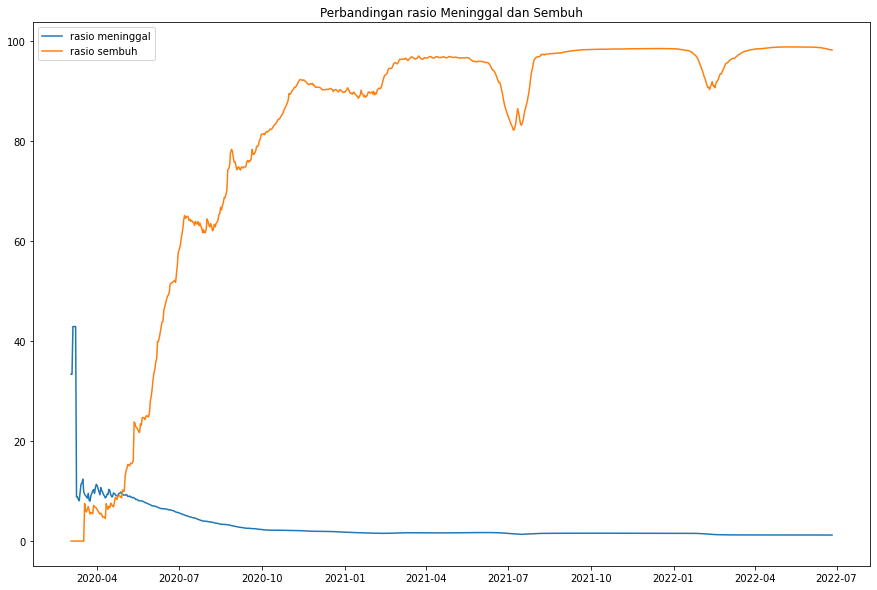

In [ ]:
plt.subplots(figsize=(15,10))
plt.title('Perbandingan rasio Meninggal dan Sembuh')
plt.plot(daily_jkt_df['Tanggal'], (daily_jkt_df['Meninggal']/daily_jkt_df['Total Pasien'])*100, label='rasio meninggal')
plt.plot(daily_jkt_df['Tanggal'], (daily_jkt_df['Sembuh']/daily_jkt_df['Total Pasien'])*100, label='rasio sembuh')
plt.legend()
plt.show()

Akan dilakukan proses feature engineering, yaitu pembuatan formula perbandingan rasio meninggal dibagi total pasien, dan pembuatan formula perbandingan rasio sembuh dibagi total pasien

Didapat dengan menggunakan visualisasi, rasio perbandingan sembuh dan meninggal berbanding terbalik.

In [ ]:
daily_jkt_df['Case Fatality Rate'] = (daily_jkt_df['Meninggal']/daily_jkt_df['Total Pasien'])*100
daily_jkt_df['Case Cure Rate'] = (daily_jkt_df['Sembuh']/daily_jkt_df['Total Pasien'])*100

Simpan feature engineering dari operasi matematika di bawah ini ke dalam label berikut ;

Case Fatality Rate :
$$\frac{Meninggal}{Total Pasien}*100$$

Case Cure Rate:
$$\frac{Sembuh}{Total Pasien}*100$$

Dokumentasi pemilihan rumus dengan menggunakan acuan referensi berikut \
https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19

In [ ]:
daily_jkt_df.fillna(0, inplace=True) 

Handling Missing value pada dataset dengan mengubah nilai NaN dengan integer 0

In [ ]:
daily_jkt_df # display dataframe

,Tanggal,Meninggal,Sembuh,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Meninggal Harian,Case Fatality Rate,Case Cure Rate
0,2020-03-01,0,0,0,0,0,0,0,0.000000,0.000000
1,2020-03-02,0,0,0,0,0,0,0,0.000000,0.000000
2,2020-03-03,1,0,3,3,2,0,1,33.333333,0.000000
3,2020-03-04,1,0,3,0,2,0,0,33.333333,0.000000
4,2020-03-05,3,0,7,4,4,0,2,42.857143,0.000000
...,...,...,...,...,...,...,...,...,...,...
843,2022-06-22,15311,1238754,1260844,1226,6779,362,0,1.214345,98.247999
844,2022-06-23,15311,1239359,1261898,1054,7228,605,0,1.213331,98.213881
845,2022-06-24,15313,1240028,1263164,1266,7823,669,2,1.212273,98.168409
846,2022-06-25,15313,1240738,1264209,1045,8158,710,0,1.211271,98.143424


Hasil dataframe baru setelah dilakukan feature engineering

## Import and Preprocessing Daily Vaccination Data in Jakarta 

In [ ]:
vaksin_df = pd.read_excel('/content/Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Vaksinasi_clean')

Load dataset bentuk excel pada lembar sheet Vaksinasi_clean(sheet ini merupakan sheet baru dari sheet vaksinasi yang telah dilakukan proses cleaning agar bisa terbaca di dataframe). Vaksinasi yang dimasukkan adalah vaksinasi 2 dan vaksinasi booster, dikarenakan fungsi vaksinasi 1 untuk mengenal vaksin dan kandungan yang ada di dalamnya kepada sistem kekebalan tubuh, dan fungsi vaksinasi 2 dan booster untuk menguatkan respons imun yang telah terbentuk sebelumnya.

Sehingga dengan asumsi vaksinasi 2 dan booster berpengaruh terhadap kekebalan COVID-19 dibanding vaksinasi 1, maka vaksinasi 1 tidak digunakan pada dataset.

In [ ]:
vaksin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tanggal            479 non-null    datetime64[ns]
 1   Target Vaksinasi   479 non-null    int64         
 2   Vaksinasi 2        479 non-null    int64         
 3   Vaksinasi Booster  479 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 15.1 KB


Mengecek banyak baris dan kolom data, beserta tipe-tipe data tiap kolom

In [ ]:
vaksin_df['Tanggal'] = pd.to_datetime(vaksin_df['Tanggal'])
vaksin_df.tail()

,Tanggal,Target Vaksinasi,Vaksinasi 2,Vaksinasi Booster
474,2022-06-22,10083716,10720116,3994824
475,2022-06-23,10083716,10722460,4008939
476,2022-06-24,10083716,10724043,4018101
477,2022-06-25,10083716,10724810,4022324
478,2022-06-26,10083716,10726363,4034544


Mengubah bentuk tipe data kolom 'Tanggal' dari object ke datetime, hal ini dilakukan untuk mempermudah visualisasi time series.

In [ ]:
vaksin_df['Persentasi Vaksinasi 2'] = (vaksin_df['Vaksinasi 2']/vaksin_df['Target Vaksinasi'])*100
vaksin_df['Persentasi Vaksinasi Booster'] = (vaksin_df['Vaksinasi Booster']/vaksin_df['Target Vaksinasi'])*100
vaksin_df.head()

,Tanggal,Target Vaksinasi,Vaksinasi 2,Vaksinasi Booster,Persentasi Vaksinasi 2,Persentasi Vaksinasi Booster
0,2021-03-05,3000689,91078,0,3.035236,0.0
1,2021-03-06,3000689,91379,0,3.045267,0.0
2,2021-03-07,3000689,93974,0,3.131747,0.0
3,2021-03-08,3000689,96978,0,3.231858,0.0
4,2021-03-09,3000689,119854,0,3.994216,0.0


Melakukan proses feature engineering, yaitu pembuatan kolom baru dengan nilainya didapat dengan cara,
1. untuk label Persentasi 2,
bagi kolom Vaksinasi 2 dengan Target Vaksinasi
2. Untuk label Persentasi Vaksinasi Booster, lalu kali dengan 100
bagi kolom Vaksinasi booster dengan target vaksinasi, lalu kali dengan 100

Tambahkan kedua kolom tersebut ke dalam dataset

In [ ]:
vaksin_df.tail()

,Tanggal,Target Vaksinasi,Vaksinasi 2,Vaksinasi Booster,Persentasi Vaksinasi 2,Persentasi Vaksinasi Booster
474,2022-06-22,10083716,10720116,3994824,106.311165,39.616586
475,2022-06-23,10083716,10722460,4008939,106.334411,39.756564
476,2022-06-24,10083716,10724043,4018101,106.350109,39.847423
477,2022-06-25,10083716,10724810,4022324,106.357716,39.889303
478,2022-06-26,10083716,10726363,4034544,106.373117,40.010488


display dataframe setelah dilakukan proses feature engineering

In [ ]:
vaksin_df.drop('Target Vaksinasi', axis=1, inplace=True)

Drop kolom 'Target Vaksinasi' dikarenakan kolom tersebut telah direpresentasikan oleh kedua kolom hasil feature engineering di atas

## Data Merging and Preprocessing Merged Data

In [ ]:
jkt_mob_df = jkt_mob_df.loc[jkt_mob_df['date'] >= '2020-03-01', :]
jkt_mob_df.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
15,2020-03-01,4.0,10.0,-11.0,6.0,6,0
16,2020-03-02,6.0,24.0,5.0,5.0,6,-1
17,2020-03-03,3.0,17.0,-1.0,3.0,5,0
18,2020-03-04,-2.0,4.0,-8.0,1.0,4,1
19,2020-03-05,3.0,8.0,1.0,4.0,5,0


Akan dilakukan data merging, yaitu menggabungkan 3 dataset yang berbeda menjadi 1 kesatuan secara horizontal, dengan begitu harus disamakan jumlah baris tiap dataset.

Proses di atas adalah proses slicing dataset jkt_mod_df yang awalnya dimulai dari tanggal 2020-02-15 menjadi tanggal yang dimulai dari 2020-03-01.

In [ ]:
jkt_mob_df.index = range(len(jkt_mob_df)) #reset index jkt_mob_df

In [ ]:
jkt_mob_df #display dataframe

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-01,4.0,10.0,-11.0,6.0,6,0
1,2020-03-02,6.0,24.0,5.0,5.0,6,-1
2,2020-03-03,3.0,17.0,-1.0,3.0,5,0
3,2020-03-04,-2.0,4.0,-8.0,1.0,4,1
4,2020-03-05,3.0,8.0,1.0,4.0,5,0
...,...,...,...,...,...,...,...
837,2022-06-16,-11.0,3.0,-1.0,-26.0,-13,8
838,2022-06-17,-9.0,4.0,5.0,-27.0,-11,9
839,2022-06-18,-10.0,7.0,8.0,-21.0,-5,5
840,2022-06-19,-10.0,4.0,3.0,-18.0,0,5


In [ ]:
covid_df = daily_jkt_df.merge(vaksin_df, how='outer', on='Tanggal').merge(jkt_mob_df, how='outer', left_on='Tanggal', right_on='date').drop('date', axis=1)
covid_df.head() #display 5 baris awal dataframe

,Tanggal,Meninggal,Sembuh,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Meninggal Harian,Case Fatality Rate,Case Cure Rate,Vaksinasi 2,Vaksinasi Booster,Persentasi Vaksinasi 2,Persentasi Vaksinasi Booster,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-01,0,0,0,0,0,0,0,0.000000,0.0,NaN,NaN,NaN,NaN,4.0,10.0,-11.0,6.0,6.0,0.0
1,2020-03-02,0,0,0,0,0,0,0,0.000000,0.0,NaN,NaN,NaN,NaN,6.0,24.0,5.0,5.0,6.0,-1.0
2,2020-03-03,1,0,3,3,2,0,1,33.333333,0.0,NaN,NaN,NaN,NaN,3.0,17.0,-1.0,3.0,5.0,0.0
3,2020-03-04,1,0,3,0,2,0,0,33.333333,0.0,NaN,NaN,NaN,NaN,-2.0,4.0,-8.0,1.0,4.0,1.0
4,2020-03-05,3,0,7,4,4,0,2,42.857143,0.0,NaN,NaN,NaN,NaN,3.0,8.0,1.0,4.0,5.0,0.0


Cell di atas adalah proses pembuatan dataset baru, yang dibuat dari penggabungan 3 dataset, yaitu,daily_jkt_df, vaksin_df, jkt_mob_df. Dengan menggunakan metode merge(),

Langkah awal adalah dengan menggabungkan daily_jkt_df dengan vaksin_df.Proses merge dengan outer join memastikan kolom yang memiliki nilai kosong,tetap bernilai NaN setelah proses penggabungan. lalu proses penggabungan dilanjutkan dengan menggabungkan gabungan daily_jkt_df dan vaksin_df dengan jkt_mob_df. Proses merge dengan outer join memastikan kolom yang memiliki nilai kosong,tetap bernilai NaN setelah proses penggabungan.

In [ ]:
covid_df.tail() #display 5 baris terakhir dataframe

,Tanggal,Meninggal,Sembuh,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Meninggal Harian,Case Fatality Rate,Case Cure Rate,Vaksinasi 2,Vaksinasi Booster,Persentasi Vaksinasi 2,Persentasi Vaksinasi Booster,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
843,2022-06-22,15311,1238754,1260844,1226,6779,362,0,1.214345,98.247999,10720116.0,3994824.0,106.311165,39.616586,NaN,NaN,NaN,NaN,NaN,NaN
844,2022-06-23,15311,1239359,1261898,1054,7228,605,0,1.213331,98.213881,10722460.0,4008939.0,106.334411,39.756564,NaN,NaN,NaN,NaN,NaN,NaN
845,2022-06-24,15313,1240028,1263164,1266,7823,669,2,1.212273,98.168409,10724043.0,4018101.0,106.350109,39.847423,NaN,NaN,NaN,NaN,NaN,NaN
846,2022-06-25,15313,1240738,1264209,1045,8158,710,0,1.211271,98.143424,10724810.0,4022324.0,106.357716,39.889303,NaN,NaN,NaN,NaN,NaN,NaN
847,2022-06-26,15313,1241429,1265264,1055,8522,691,0,1.210261,98.116203,10726363.0,4034544.0,106.373117,40.010488,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 847
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Tanggal                                             848 non-null    datetime64[ns]
 1   Meninggal                                           848 non-null    int64         
 2   Sembuh                                              848 non-null    int64         
 3   Total Pasien                                        848 non-null    int64         
 4   Positif Harian                                      848 non-null    int64         
 5   Positif Aktif                                       848 non-null    int64         
 6   Sembuh Harian                                       848 non-null    int64         
 7   Meninggal Harian                                    848 non-null    int64         
 8   Case Fatal

In [ ]:
covid_df.fillna(0, inplace=True) #mengganti nilai NaN menjadi int 0
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 847
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Tanggal                                             848 non-null    datetime64[ns]
 1   Meninggal                                           848 non-null    int64         
 2   Sembuh                                              848 non-null    int64         
 3   Total Pasien                                        848 non-null    int64         
 4   Positif Harian                                      848 non-null    int64         
 5   Positif Aktif                                       848 non-null    int64         
 6   Sembuh Harian                                       848 non-null    int64         
 7   Meninggal Harian                                    848 non-null    int64         
 8   Case Fatal

Handle Missing Value dengan mengubahnya menjadi integer 0

In [ ]:
covid_df['tahun'] = [t.year for t in covid_df['Tanggal']] #membuat kolom baru yaitu tahun, dengan mengambil nilai tahun dari kolom tanggal
covid_df['bulan'] = [t.month for t in covid_df['Tanggal']] #membuat kolom baru yaitu bulan, dengan mengambil nilai tahun dari kolom tanggal
covid_df.head() #display 5 baris pertama dataframe

,Tanggal,Meninggal,Sembuh,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Meninggal Harian,Case Fatality Rate,Case Cure Rate,...,Persentasi Vaksinasi 2,Persentasi Vaksinasi Booster,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,tahun,bulan
0,2020-03-01,0,0,0,0,0,0,0,0.000000,0.0,...,0.0,0.0,4.0,10.0,-11.0,6.0,6.0,0.0,2020,3
1,2020-03-02,0,0,0,0,0,0,0,0.000000,0.0,...,0.0,0.0,6.0,24.0,5.0,5.0,6.0,-1.0,2020,3
2,2020-03-03,1,0,3,3,2,0,1,33.333333,0.0,...,0.0,0.0,3.0,17.0,-1.0,3.0,5.0,0.0,2020,3
3,2020-03-04,1,0,3,0,2,0,0,33.333333,0.0,...,0.0,0.0,-2.0,4.0,-8.0,1.0,4.0,1.0,2020,3
4,2020-03-05,3,0,7,4,4,0,2,42.857143,0.0,...,0.0,0.0,3.0,8.0,1.0,4.0,5.0,0.0,2020,3


Buat kolom baru, yaitu Tahun dan Bulan, untuk membantu proses visualisasi data

## Split Training Set and Test set (for forecasting)

In [ ]:
covid_df_train = covid_df.loc[covid_df['Tanggal'] <= '2022-06-20', :].copy() #pembagian data train dari 2022-03-01 hingga 2022-06-20
covid_df_test = covid_df.loc[covid_df['Tanggal'] > '2022-06-06', :].copy() #pembagian data test dari 2022-06-06 hingga 2022-06-20
covid_df_test.index = range(covid_df_test.shape[0])

Membagi dataset menjadi data train dan data test. Idenya adalah membagi dataset menjadi data train dan data test untuk memprediksi nilai dari variabel target yang diinginkan. Dalam hal ini, nilai dari variabel target yang ingin diprediksi adalah di Tanggal 2022-06-21, maka pembagian data train adalah keseluruhan dataset dengan index tanggal sebelum 2022-06-21. Dan dengan membagi data test adalah 14 hari sebelum tanggal pada baris akhir data train, maka terhitung data test dimulai dari 2020-06-06.

In [ ]:
covid_df_train.tail(3) #display 3 baris terakhir dataframe data train

,Tanggal,Meninggal,Sembuh,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Meninggal Harian,Case Fatality Rate,Case Cure Rate,...,Persentasi Vaksinasi 2,Persentasi Vaksinasi Booster,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,tahun,bulan
839,2022-06-18,15305,1237400,1257229,733,4524,291,0,1.217360,98.422801,...,106.282565,39.454056,-10.0,7.0,8.0,-21.0,-5.0,5.0,2022,6
840,2022-06-19,15308,1237676,1257964,735,4980,276,3,1.216887,98.387235,...,106.286760,39.489242,-10.0,4.0,3.0,-18.0,0.0,5.0,2022,6
841,2022-06-20,15309,1238059,1258665,701,5297,383,1,1.216289,98.362869,...,106.289824,39.516295,-13.0,4.0,-4.0,-27.0,-13.0,8.0,2022,6


In [ ]:
covid_df_test #display baris pada dataframe data test

,Tanggal,Meninggal,Sembuh,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Meninggal Harian,Case Fatality Rate,Case Cure Rate,...,Persentasi Vaksinasi 2,Persentasi Vaksinasi Booster,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,tahun,bulan
0,2022-06-07,15303,1235274,1251986,260,1409,102,0,1.222298,98.665161,...,106.185041,38.886865,-14.0,5.0,-9.0,-26.0,-12.0,8.0,2022,6
1,2022-06-08,15303,1235370,1252274,288,1601,96,0,1.222017,98.650136,...,106.195464,38.940377,-13.0,2.0,-11.0,-26.0,-12.0,8.0,2022,6
2,2022-06-09,15303,1235508,1252550,276,1739,138,0,1.221748,98.639416,...,106.206283,38.996844,-15.0,0.0,-11.0,-27.0,-11.0,8.0,2022,6
3,2022-06-10,15303,1235666,1252883,333,1914,158,0,1.221423,98.625809,...,106.213186,39.027636,-7.0,7.0,7.0,-25.0,-8.0,8.0,2022,6
4,2022-06-11,15303,1235838,1253197,314,2056,172,0,1.221117,98.614823,...,106.222438,39.068663,-10.0,7.0,7.0,-21.0,-5.0,5.0,2022,6
5,2022-06-12,15303,1236002,1253519,322,2214,164,0,1.220803,98.602574,...,106.224818,39.081952,-11.0,2.0,-4.0,-18.0,-1.0,6.0,2022,6
6,2022-06-13,15304,1236184,1253867,348,2379,182,1,1.220544,98.589723,...,106.226732,39.090817,-13.0,3.0,-8.0,-26.0,-11.0,8.0,2022,6
7,2022-06-14,15304,1236374,1254384,517,2706,190,0,1.220041,98.564236,...,106.239337,39.171442,-14.0,2.0,-6.0,-26.0,-13.0,8.0,2022,6
8,2022-06-15,15304,1236528,1255114,730,3282,154,0,1.219331,98.519178,...,106.250364,39.245512,-14.0,0.0,-9.0,-26.0,-13.0,9.0,2022,6
9,2022-06-16,15305,1236820,1255810,696,3685,292,1,1.218735,98.487829,...,106.260311,39.310399,-11.0,3.0,-1.0,-26.0,-13.0,8.0,2022,6


In [ ]:
covid_df_train.columns

Index(['Tanggal', 'Meninggal', 'Sembuh', 'Total Pasien', 'Positif Harian',
       'Positif Aktif', 'Sembuh Harian', 'Meninggal Harian',
       'Case Fatality Rate', 'Case Cure Rate', 'Vaksinasi 2',
       'Vaksinasi Booster', 'Persentasi Vaksinasi 2',
       'Persentasi Vaksinasi Booster',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'tahun', 'bulan'],
      dtype='object')

# Exploratory Data Analysis

---



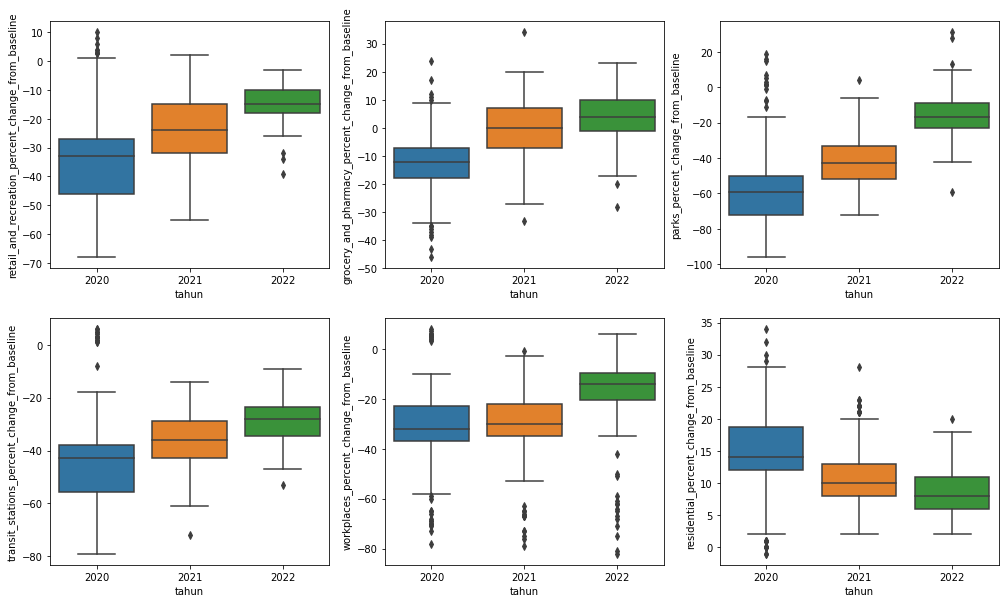

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(17,10))
sns.boxplot(x=covid_df_train['tahun'], y=covid_df_train['retail_and_recreation_percent_change_from_baseline'], ax=ax[0][0])
sns.boxplot(x=covid_df_train['tahun'], y=covid_df_train['grocery_and_pharmacy_percent_change_from_baseline'], ax=ax[0][1])
sns.boxplot(x=covid_df_train['tahun'], y=covid_df_train['parks_percent_change_from_baseline'], ax=ax[0][2])
sns.boxplot(x=covid_df_train['tahun'], y=covid_df_train['transit_stations_percent_change_from_baseline'], ax=ax[1][0])
sns.boxplot(x=covid_df_train['tahun'], y=covid_df_train['workplaces_percent_change_from_baseline'], ax=ax[1][1])
sns.boxplot(x=covid_df_train['tahun'], y=covid_df_train['residential_percent_change_from_baseline'], ax=ax[1][2])
plt.show()

Terlihat untuk setiap fitur mobilitas pada tahun 2020, 2021, dan 2022 yang divisualisasikan menggunakan boxplot, terdapat beberapa outlier pada fitur-fitur tersebut. Hal ini dikarenakan terdapat data yang lebih besar dari batas atas atau lebih kecil dari batas bawah fitur, di mana batas atas adalah $Q3 + 1.5IQR$ dan batas bawah adalah $Q1 - 1.5IQR$, dimana $Q3$ adalah kuartil 3, $Q1$ adalah kuartil 1, dan $IQR$ adalah interquartile range dari masing - masing kolom.

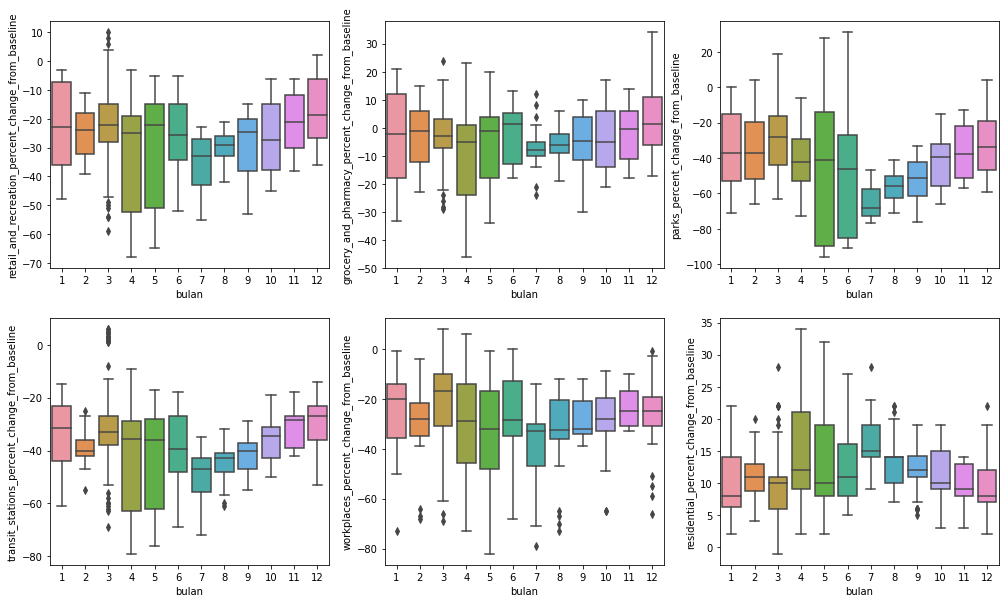

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(17,10))
sns.boxplot(x=covid_df_train['bulan'], y=covid_df_train['retail_and_recreation_percent_change_from_baseline'], ax=ax[0][0])
sns.boxplot(x=covid_df_train['bulan'], y=covid_df_train['grocery_and_pharmacy_percent_change_from_baseline'], ax=ax[0][1])
sns.boxplot(x=covid_df_train['bulan'], y=covid_df_train['parks_percent_change_from_baseline'], ax=ax[0][2])
sns.boxplot(x=covid_df_train['bulan'], y=covid_df_train['transit_stations_percent_change_from_baseline'], ax=ax[1][0])
sns.boxplot(x=covid_df_train['bulan'], y=covid_df_train['workplaces_percent_change_from_baseline'], ax=ax[1][1])
sns.boxplot(x=covid_df_train['bulan'], y=covid_df_train['residential_percent_change_from_baseline'], ax=ax[1][2])
plt.show()

Menggunakan metode yang sama dengan yang sebelumnya, hanya data untuk setiap bulan pada ketiga periode tahun digabung jadi satu baru kemudian divisualisasikan dengan boxplot, Terlihat juga terdapat outlier pada bulan-bulan tertentu pada data mobilitas yang sudah digabung untuk semua periode tahun. \
Untuk beberapa bulan juga terlihat terdapat penurunan data mobilitas atau semakin minus, hal ini menandakan mobilitas pada pada fitur tersebut semakin rendah atau menuju ketiadaannya aktivitas yang berlangsung pada tempat tertentu contohnya seperti di fitur selain residential, pada bulan ke-4, 5, dan 6. Namun, ada juga fitur yang mengalami peningkatan mobilitas untuk beberapa bulan, seperti fitur 'retail and recreation', 'parks', dan 'transit' yang mengalami kenaikan mobilitas dari bulan ke-7 sampai akhir tahun.

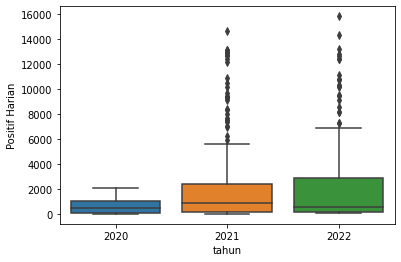

In [ ]:
sns.boxplot(x=covid_df_train['tahun'], y=covid_df_train['Positif Harian'])

Untuk fitur positif harian terdapat outlier di setiap periode tahun, hal ini mungkin saja terjadi karena kita ketahui bahwa terdapat beberapa gelombang covid yang diakibatkan dari adanya varian virus covid terbaru pada beberapa periode bulan yang dinyatakan lebih cepat menular dari pada varian sebelumnya sehingga memungkinan bahwa terjadinya penularan yang masif. Hal ini juga bisa disebabkan karena sebelum adanya peningkatan covid pada gelombang baru, terdapat kebijakan mengenai kelonggaran mobilitas pada tempat-tempat tertentu. Sehingga pada saat muncul virus varian terbaru, terjadilah gelombang baru peningkatan pada penyebaran virus yang menyebabkan banyaknya kasus baru pada positif harian. 

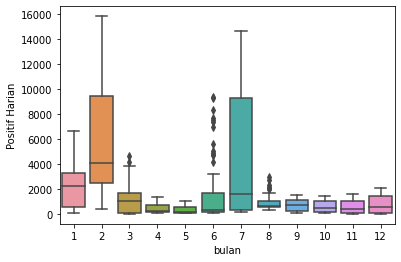

In [ ]:
sns.boxplot(x=covid_df_train['bulan'], y=covid_df_train['Positif Harian'])

Visualisasi di atas juga menjelaskan terdapat waktu pada bulan tertentu di mana kasus positif harian lebih besar dibandingkan dengan bulan lainnya.

Pada beberapa visualisasi di atas terlihat bahwa terdapat outlier pada beberapa fitur, hanya saja kami mengambil keputusan untuk tidak menghilangkan atau menggantikan data outlier tersebut. Hal ini dilakukan untuk menjaga keaslian dataset yang digunakan supaya tetap sesuai dengan apa yang terjadi sesungguhnya selama ini, seperti terdapat pelonjakan jumlah positif harian, total kasus, gelombang covid baru, dll yang bersesuaian dengan covid-19.

In [ ]:
covid_df_train.set_index('Tanggal', inplace=True)
covid_df_test.set_index('Tanggal', inplace=True)

Kolom Tanggal dijadikan sebagai index agar mempermudah visualisasi dengan line plot.

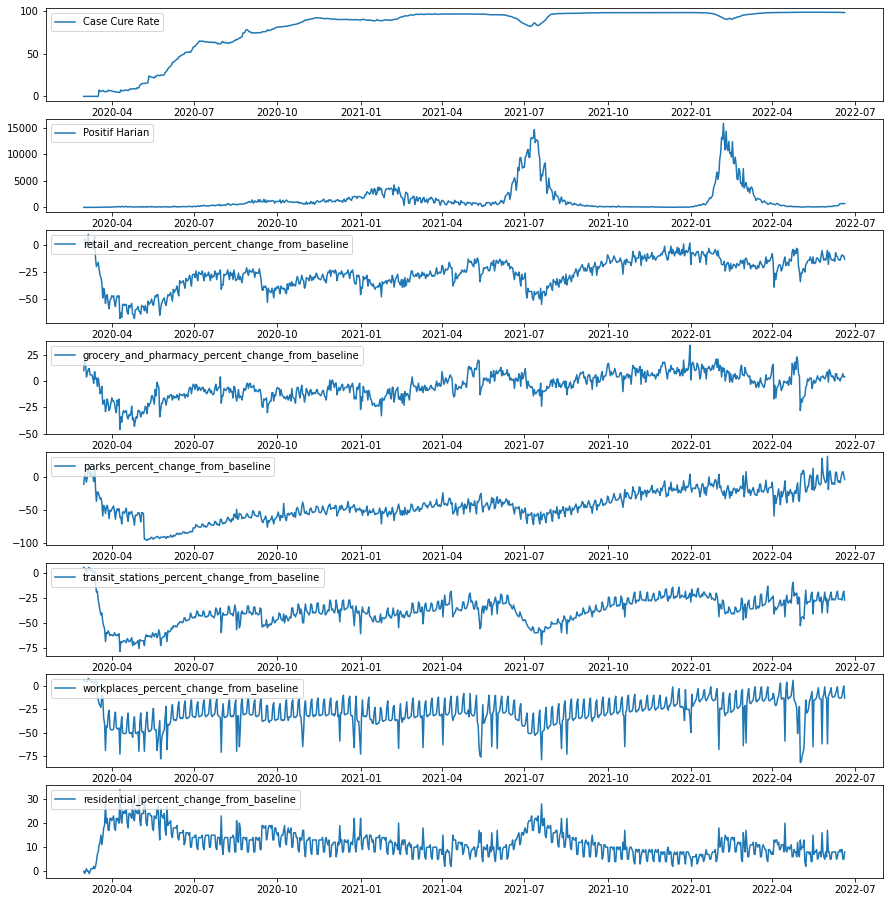

In [ ]:
fig, ax = plt.subplots(8,1,figsize=(15,16))
ax[0].plot(covid_df_train['Case Cure Rate'], label='Case Cure Rate')
ax[0].legend(loc='upper left')
ax[1].plot(covid_df_train['Positif Harian'], label='Positif Harian')
ax[1].legend(loc='upper left')
for i in range(13, covid_df_train.shape[1]-2):
  ax[i-11].plot(covid_df_train.iloc[:,i], label=covid_df_train.columns[i])
  ax[i-11].legend(loc='upper left')
plt.show()

Untuk visualisasi pertama, case cure rate, adalah rasio dari total sembuh per total kasus covid di Jakarta dalam persen. Terlihat bahwa grafik menunjukkan kenaikan di sepanjang periode, hal ini berarti bahwa selama periode covid terjadi meskipun jumlah kasus terus bertambah, akan tetapi jumlah pasien yang sembuh dari covid juga banyak. Itulah alasan mengapa grafik menunjukkan kenaikan dengan persentase diatas 50% dari total kasus di Jakarta.

Kemudian untuk visualisasi pada data mobilitas beberapa fitur, terlihat juga bahwa pada saat jumlah positif harian mengalami peningkatan grafik akibat adanya gelombang virus varian terbaru, yaitu delta pada periode 2021 bulan 7 dan omicron pada periode 2022 bulan 1 sampai 4. Grafik mobilitas pada 5 fitur ('retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',) mengalami penurunan grafik pada periode yang sama saat terjadi gelombang virus baru, tetapi hal tersebut terbalik dengan fitur 'residential_percent_change_from_baseline' di mana saat grafik fitur tersebut mengalami kenaikan pada periode yang sama juga. Hal ini diakibatkan oleh adanya gelombang varian virus covid terbaru yang mengalami mutasi genetik dengan kemampuan penularan lebih tinggi dan cepat sehingga berakibat pada aktivitas/mobilitas masyarakat yang lebih memilih untuk mengurangi kegiatan mobilitas di luar rumah. Itulah alasan mengapa terjadi peningkatan grafik pada fitur mobilitas di perumahan dan penurunan grafik mobilitas di luar rumah pada periode yang sama saat terjadinya gelombang varian virus baru. 

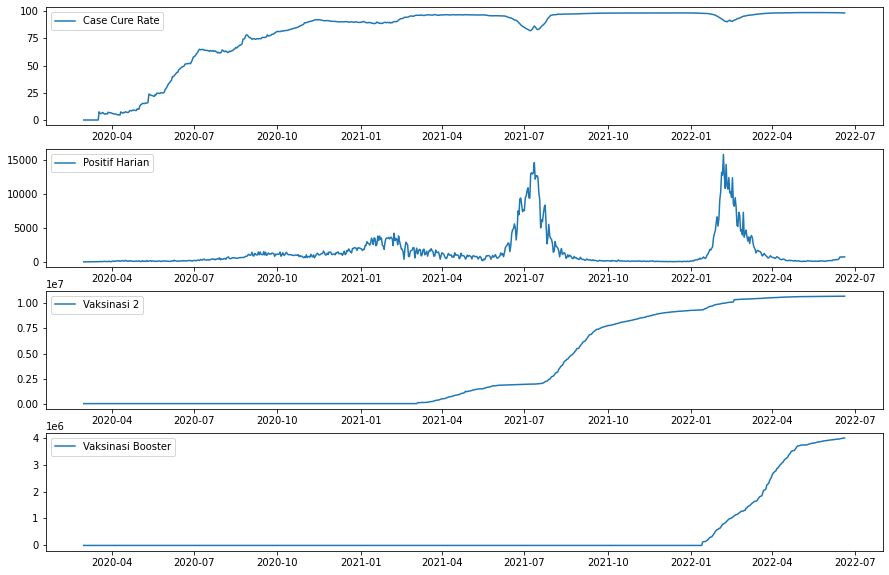

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(15,10))
ax[0].plot(covid_df_train['Case Cure Rate'], label='Case Cure Rate')
ax[0].legend(loc='upper left')
ax[1].plot(covid_df_train['Positif Harian'], label='Positif Harian')
ax[1].legend(loc='upper left')
ax[2].plot(covid_df_train['Vaksinasi 2'], label='Vaksinasi 2')
ax[2].legend(loc='upper left')
ax[3].plot(covid_df_train['Vaksinasi Booster'], label='Vaksinasi Booster')
ax[3].legend(loc='upper left')
plt.show()

Pada visualisasi vaksinasi ke-2 terlihat bahwa vaksinasi yang telah dilakukan
pada periode tahun pertama sampai awal tahun kedua belum ada peningkatan jumlah secara signifikan. Kemudian, menuju pertengahan tahun periode kedua jumlah orang yang telah melakukan vaksinasi kedua mulai meningkat dan juga disusul dengan adanya gelombang virus varian baru, yaitu delta yang membuat mobilitas masyarakat di luar rumah kembali menurun. Setelah itu, keluar kebijakan pemerintah untuk wajib vaksin kedua sebagai salah satu syarat kelonggaran mobilitas masyarakat sehingga membuat peningkatan yang sangat signifikan terhadap jumlah orang yang melakukan vaksinasi dosis kedua. Selanjutnya, beredar juga berita bahwa akan adanya vaksin dosis ke-3 atau vaksin booster. Akan tetapi, vaksin tersebut diutamakan untuk garda terdepan, yaitu para tenaga kesehatan yang berhadapan langsung menangani para pasien covid-19 dan juga kelompok orang yang rentan terkena covid seperti lansia dan orang yang menderita penyakit komorbid. Namun, terjadi kembali gelombang varian virus baru, yaitu omicron yang memiliki kemampuan penularan lebih cepat dari varian delta sehingga mempengaruhi mobilitas masyarakat dalam berkegiatan, dimana waktu itu mendekati bulan ramadhan dan orang orang sibuk beraktivasi melanjutkan pekerjaan mencari rezeki untuk mempersiapkan masuknya bulan puasa. Kemudian, kita ketahui juga bahwa saat libur lebaran banyak orang yang melakukan mudik atau pulang ke kampung halamannya masing-masing dan juga beredar juga berita yang belum pasti atau kebijakan yang belum ditetapkan, yaitu melakukan vaksin booster sebagai syarat perjalanan sehingga orang-orang mencoba untuk mendapatkan vaksin dosis ketiga tersebut supaya dapat pulkam, padahal saat itu belum ditetapkan kebijakan yang pasti mengenai vaksin booster. Namun, kita ketahui bahwa karena masalah covid ini belum selesai dan terus bermunculan varian baru yang mana pada akhirnya nanti pemerintah akan mengeluarkan kebijakan mengenai kewajiban vaksin booster sebagai syarat perjalanan dan mempermudah mobilitas masyarakat sehingga menyebabkan adanya peningkatan jumlah orang yang melakukan vaksinasi dosis ke-3 atau vaksin booster tersebut supaya lebih bebas dalam bermobilitas, seperti yang terlihat pada grafik vaksinasi booster mulai periode tahun 2022 awal bahwa terjadi peningkatan yang sangat signifikan hingga terakhir tercatat sekitar 4 jutaan orang jika kita lihat pada grafik dan vaksinasi ke-2 sekitar 10 jutaan orang. \
\
*Visualisasi grafik vaksinasi hanya diperuntukkan wilayah Jakarta. 

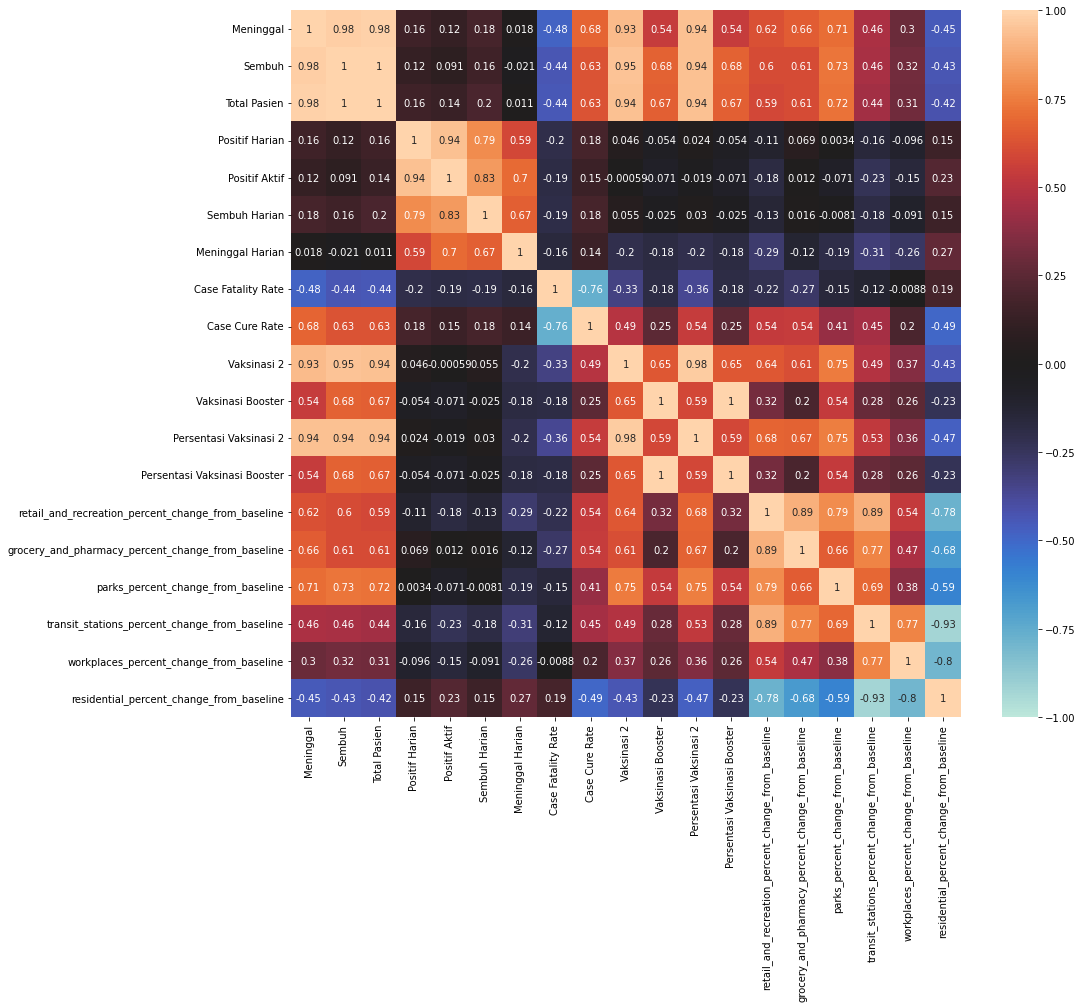

In [ ]:
plt.subplots(figsize=(15,13))
sns.heatmap(covid_df_train.drop(['tahun', 'bulan'], axis=1).corr(), vmin=-1, vmax=1, center=0, annot=True)
plt.show()

Visualisasi di atas adalah koefisien korelasi dari setiap fitur pada dataset. Semakin menuju angka 1, maka korelasinya semakin kuat. Di sini akan dipilih beberapa fitur yang nantinya akan menjadi variabel independen karena variabel dependennya berisi fitur fitur mobilitas yang akan dilakukan forecasting untuk beberapa hari kedepannya, maka variabel independen yang dipilih diantaranya adalah 'retail_and_recreation_percent_change_from_baseline',
                                     'grocery_and_pharmacy_percent_change_from_baseline',
                                     'parks_percent_change_from_baseline',
                                     'transit_stations_percent_change_from_baseline',
                                     'workplaces_percent_change_from_baseline',
                                     'residential_percent_change_from_baseline', 
                                     'Meninggal', 'Sembuh', 'Total Pasien', 'Case Cure Rate', 
                                     'Persentasi Vaksinasi 2'. Dengan pertimbangan koefisien dari fitur fitur yang dipilih tersebut dan juga alasan-alasan lainnya yang bersangkutan dengan covid-19.

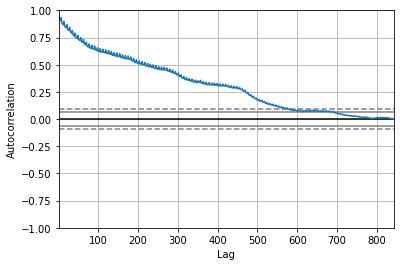

In [ ]:
ax = pd.plotting.autocorrelation_plot(covid_df_train[['retail_and_recreation_percent_change_from_baseline',
                                                     'grocery_and_pharmacy_percent_change_from_baseline',
                                                     'parks_percent_change_from_baseline',
                                                     'transit_stations_percent_change_from_baseline',
                                                     'workplaces_percent_change_from_baseline',
                                                     'residential_percent_change_from_baseline']])

Dapat dilihat pada visualisasi di atas dan juga code cell di bawah, dapat disimpulkan bahwa semakin lama harinya maka korelasi dari setiap fitur mobilitas akan semakin rendah dan didapatkan korelasi dari setiap fitur mobilitas untuk 14 hari kebelakang sangat tinggi dengan koefisien sekitar 0.897. Hal inilah yang menjadi alasan untuk nantinya saat di section modelling, metode generator time series, di-*set* untuk hyperparameter length sebesar 14.

In [ ]:
ax.lines[5].get_data()[1][13]

0.8968174303216158

Selanjutnya, diambil kolom - kolom yang memiliki korelasi besar berdasarkan heatmap dan auto-correlation plot, sehingga dapat digunakan untuk modeling time series forecasting pada mobilitas di Jakarta.

In [ ]:
covid_df_mob_train = covid_df_train[['retail_and_recreation_percent_change_from_baseline',
                                     'grocery_and_pharmacy_percent_change_from_baseline',
                                     'parks_percent_change_from_baseline',
                                     'transit_stations_percent_change_from_baseline',
                                     'workplaces_percent_change_from_baseline',
                                     'residential_percent_change_from_baseline', 
                                     'Meninggal', 'Sembuh', 'Total Pasien', 'Case Cure Rate', 
                                     'Persentasi Vaksinasi 2']]
covid_df_mob_test = covid_df_test[['retail_and_recreation_percent_change_from_baseline',
                                   'grocery_and_pharmacy_percent_change_from_baseline',
                                   'parks_percent_change_from_baseline',
                                   'transit_stations_percent_change_from_baseline',
                                   'workplaces_percent_change_from_baseline',
                                   'residential_percent_change_from_baseline', 
                                   'Meninggal', 'Sembuh', 'Total Pasien', 'Case Cure Rate', 
                                   'Persentasi Vaksinasi 2']]

In [ ]:
covid_df_mob_train.head(3)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Meninggal,Sembuh,Total Pasien,Case Cure Rate,Persentasi Vaksinasi 2
Tanggal,,,,,,,,,,,
2020-03-01,4.0,10.0,-11.0,6.0,6.0,0.0,0,0,0,0.0,0.0
2020-03-02,6.0,24.0,5.0,5.0,6.0,-1.0,0,0,0,0.0,0.0
2020-03-03,3.0,17.0,-1.0,3.0,5.0,0.0,1,0,3,0.0,0.0


# Modelling

---



Sebelum pembuatan model, akan dilakukan feature scaling terlebih dahulu agar model lebih optimal. Kemudian, training set yang sudah ada sebelumnya di-split sehingga menghasilkan validation set agar tidak terjadi overfitting ketika proses training model. Terakhir, dibentuk time series generator agar model dapat mengenali bahwa data yang digunakan adalah data berupa time series. Setelah semua proses tersebut selesai, dilakukan proses modelling (training, evaluasi, dan prediksi/forecasting)

## Feature Scaling

Akan digunakan metode standardisasi dengan menggunakan StandardScaler dari package scikit-learn, untuk melakukan feature scaling.

Formula standardisasi:

$x_{i,j}^{scaled}=\frac{x_{i,j} - \mu_j}{\sigma_j}$

dimana,

- $i$ : index untuk baris ke-$i$
- $j$ : index untuk kolom ke-$j$
- $x_{i,j}$ : sampel pada baris ke-$i$ dan kolom ke-$j$ yang belum di-scale
- $x_{i,j}^{scaled}$ : hasil scaling sampel pada baris ke-$i$ dan kolom ke-$j$
- $\mu_j$ : mean fitur kolom ke-$j$
- $\sigma_j$ : standar deviasi fitur kolom ke-$j$ 

In [ ]:
# Membuat scaler untuk keseluruhan fitur dan untuk fitur target
scaler = StandardScaler()                                               # scaler untuk keseluruhan fitur
scaler_pred = StandardScaler()                                          # scaler untuk fitur target

# Proses scaling
covid_df_mob_train_scaled = scaler.fit_transform(covid_df_mob_train)    # scaling pada keseluruhan fitur
scaler_pred.fit(covid_df_mob_train.iloc[:, :6])                         # training scaler untuk fitur target

StandardScaler()

Digunakan dua scaler, yaitu scaler untuk keseluruhan data (scaler) dan scaler untuk fitur target (scaler_pred). 

scaler_pred nantinya akan digunakan untuk melakukan inverse transform pada hasil prediksi model, karena apabila kita menggunakan scaler keseluruhan data untuk melakukan inverse transform pada hasil prediksi model, akan terjadi error yang disebabkan oleh adanya perbedaan banyaknya fitur/kolom pada saat scaler melakukan training. Sehingga, scaler_pred hanya di-fit pada 6 kolom pertama pada covid_df_mob_train, yaitu kolom - kolom mobilitas yang nantinya akan diprediksi oleh model.

Scaler untuk keseluruhan data di-fit pada covid_df_mob_train (data training) kemudian hasil scaling-nya disimpan pada covid_df_mob_train_scaled.

In [ ]:
# Scaling data test
test_scaled = scaler.transform(covid_df_mob_test)

Scaler yang sudah di-fit pada keseluruhan data train, digunakan untuk mentransform data test. Kemudian, hasil transform disimpan pada variabel test_scaled.

## Split Validation Set from Training Set

In [ ]:
train_scaled = covid_df_mob_train_scaled[:-14]
val_scaled = covid_df_mob_train_scaled[-28:]

train_scaled.shape, val_scaled.shape

((828, 11), (28, 11))

Data training di-split sehingga menghasilkan data validasi, agar nantinya kita dapat mengetahui bahwa model tidak mengalami overfitting pada saat proses training model. Pada cell - cell berikutnya, data training sebelum di-split akan disebut sebagai data training keseluruhan, dan data training setelah split disebut sebagai data training.

Data training diambil dari data training keseluruhan baris pertama hingga baris ke-15 dari bawah.

Data validasi diambil dari data training keseluruhan baris ke-14 dari bawah hingga baris terakhir.

Pembagian splitting dilakukan seperti diatas karena melalui auto-correlation plot mobilitas pada bagian EDA, terlihat bahwa pada saat lag = 14, diperoleh korelasi yang cukup besar (mendekati 1). Sehingga, nantinya model akan memprediksi mobilitas hari ke-$x$ dengan melihat pergerakan mobilitas selama 14 hari sebelum hari ke-$x$. Artinya, data validasi yang akan dievaluasi nilai prediksinya oleh model adalah data 14 hari terakhir, karena 14 hari pertama pada data validasi digunakan oleh model untuk melihat pergerakannya saja. 

Diperoleh 828 sampel untuk data training dan 28 sampel untuk data validasi.

## Generate Time Series for Modelling

Selanjutnya, digunakan class TimeseriesGenerator dari package Keras, untuk menghasilkan generator berupa time series yang akan digunakan untuk training model.

In [ ]:
# Membuat generator untuk training set
train_generator = TimeseriesGenerator(train_scaled, train_scaled[:,:6], length=14, batch_size=1)
print("Total number of samples in the original training data = ", len(train_scaled))
print("Total number of samples in the generated data = ", len(train_generator))

Total number of samples in the original training data =  828
Total number of samples in the generated data =  814


Dimasukkan 4 parameter pada TimeseriesGenerator, yaitu x (variabel prediktor) = train_scaled, y (variabel target, yaitu fitur - fitur mobilitas) = train_scaled[:, :6], length (yaitu, panjang waktu dari time series untuk menentukan prediksi) = 14, dan batch_size (banyaknya sampel untuk mengupdate weights dan bias dari model saat training) = 1.

Diperoleh bahwa total data sebelum di-generate sebanyak 828 dan setelah di-generate sebanyak 814, karena 14 hari pertama dari training set dianggap sebagai variabel prediktor (tidak bisa diprediksi nilainya, model hanya melihat pergerakannya saja). 

In [ ]:
# Melihat shape dari salah satu data train hasil generator
x, y = train_generator[1]
x.shape, y.shape

((1, 14, 11), (1, 6))

Shape untuk x berbentuk (batch size, panjang waktu dari time series, total fitur prediktor) dan untuk y berbentuk (batch size, total fitur target).

In [ ]:
val_generator = TimeseriesGenerator(val_scaled, val_scaled[:,:6], length=14, batch_size=1)
print("Total number of samples in the original validation data = ", len(val_scaled))
print("Total number of samples in the generated data = ", len(val_generator))

Total number of samples in the original validation data =  28
Total number of samples in the generated data =  14


In [ ]:
x, y = val_generator[1]
x.shape, y.shape

((1, 14, 11), (1, 6))

Penjelasan generator untuk data train berlaku juga untuk data validasi, hanya saja total sampelnya yang berbeda.

## Build Model for Time Series Forecasting

Model yang kami gunakan adalah model Neural Network dengan arsitektur Long-Short Term Memory (LSTM) yang dikombinasikan dengan Dense layer.

LSTM adalah salah satu arsitektur modifikasi dari Recurrent Neural Network (RNN), yaitu arsitektur neural network yang dapat menyajikan informasi berdasarkan informasi - informasi sebelumnya (berbentuk barisan/sequences). Terdapat perbedaan dari arsitektur LSTM dengan RNN sederhana, yaitu unit pada RNN hanya memiliki satu fungsi aktivasi yang akan dijalankan berulang berdasarkan sequences yang dimiliki oleh dataset, sedangkan LSTM memiliki beberapa fungsi aktivasi yang memiliki fungsinya masing - masing. LSTM memiliki dua jenis state yang bernama hidden state dan cell state. Pada hidden state terdapat 3 jenis "gerbang" yaitu forget gate, input gate, dan output gate. Sedangkan, pada cell state dilakukan operasi perkalian dengan hasil forget gate dan penjumlahan dengan hasil input gate. Cell state biasa disebut sebagai bagian yang membuat LSTM dapat memiliki ingatan lebih lama dibanding RNN sederhana, karena adanya operasi perkalian dengan hasil forget gate, yang akan memfilter data yang tidak terlalu penting. Sehingga, LSTM dapat bekerja lebih baik pada dataset dengan sequences yang panjang dibandingkan dengan RNN sederhana.

Berikut gambar arsitektur dari LSTM:
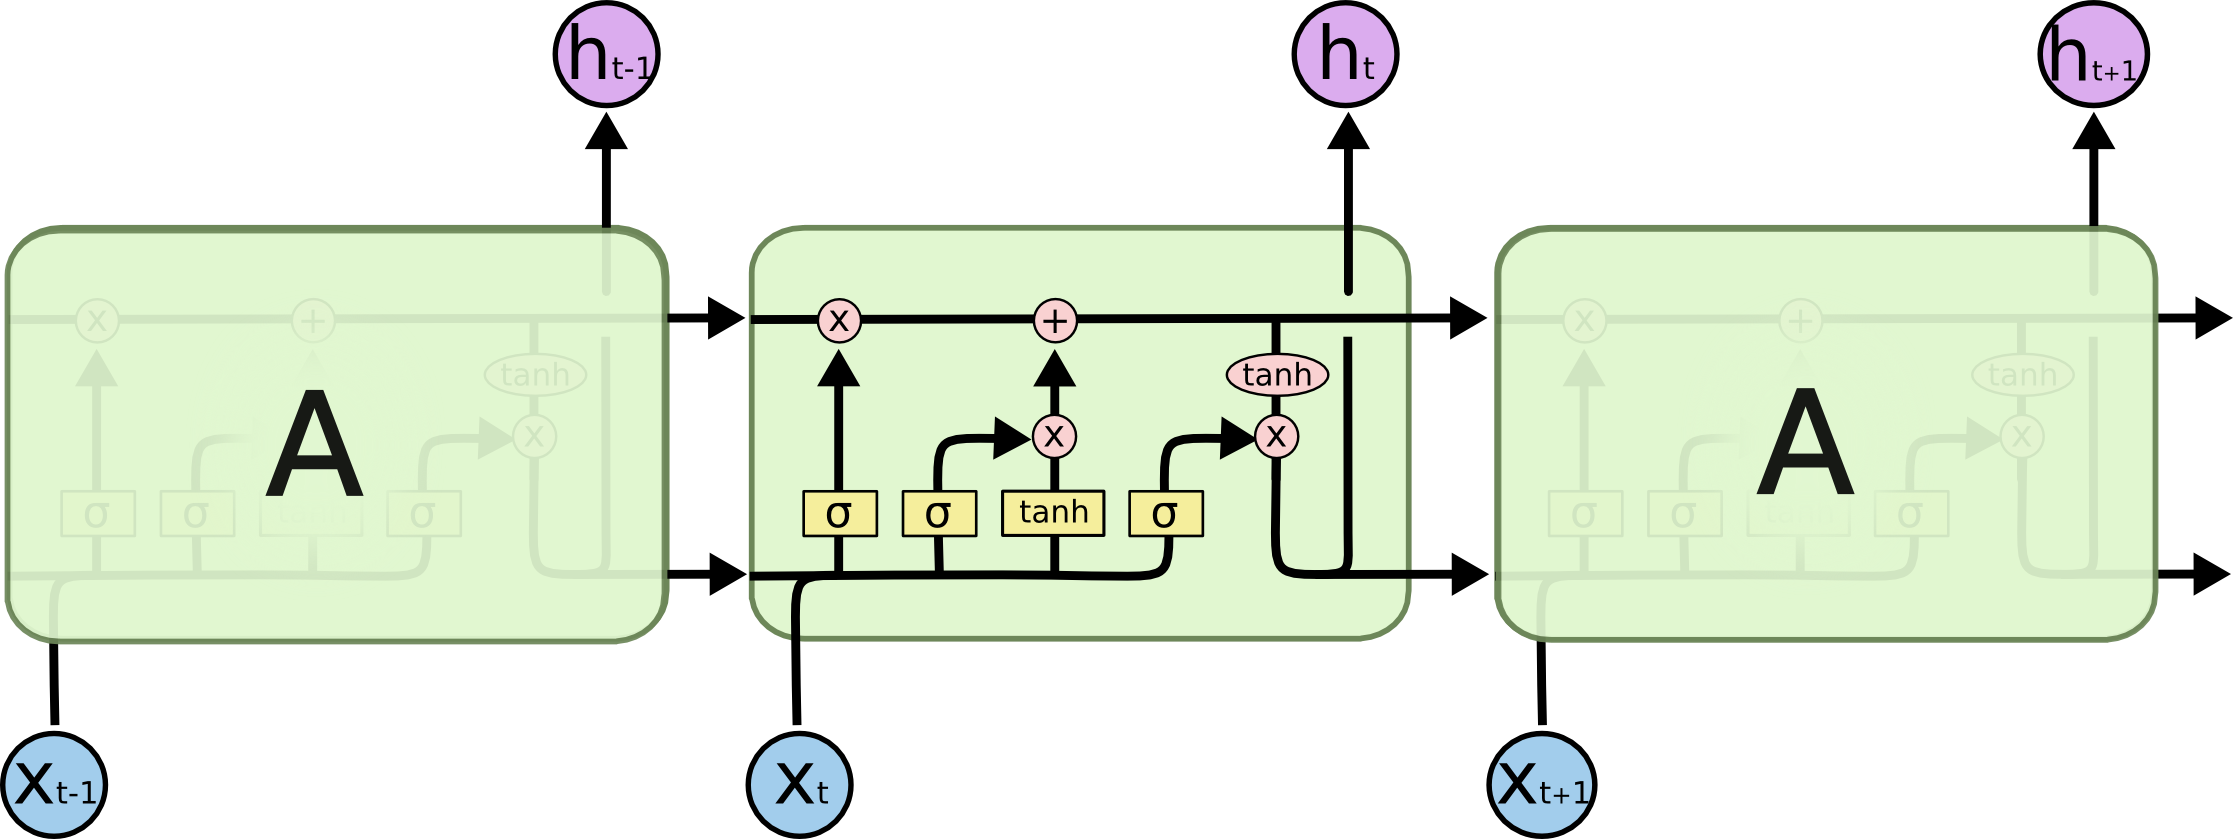

Sumber gambar: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

Model didefinisikan dalam bentuk function agar proses hyperparameter tuning menjadi lebih mudah. Proses hyperparameter tuning tidak dimasukkan pada notebook ini, karena akan memakan banyak ruang pada notebook.

In [ ]:
# Mendefinisikan function untuk membuat model
def build_model(n_neurons_lstm=(64,32), n_neurons_dense=(32,16), activation_lstm='tanh',
                activation_dense='relu', dropout_on_lstm=True, dropout_lstm_list=[0.2, 0.2], 
                lr=1e-3):
  
  # Membuat arsitektur neural network sequential
  model = keras.models.Sequential()

  # Membuat layer LSTM dan dropout layernya
  for i in range(len(n_neurons_lstm)):
    if i != len(n_neurons_lstm)-1:
      return_seq=True
    else:
      return_seq=False
    
    if i == 0:
      # layer LSTM pertama, dimana inputnya berasal dari input layer
      model.add(keras.layers.LSTM(n_neurons_lstm[i], activation=activation_lstm, input_shape=(14,11), return_sequences=return_seq))
    else:
      # layer LSTM selanjutnya, dimana inputnya berasal dari output layer LSTM sebelumnya
      model.add(keras.layers.LSTM(n_neurons_lstm[i], activation=activation_lstm, return_sequences=return_seq))
    
    if dropout_on_lstm:
      model.add(keras.layers.Dropout(dropout_lstm_list[i]))
  
  # Membuat layer dense
  for j in range(len(n_neurons_dense)):
    model.add(keras.layers.Dense(n_neurons_dense[j], activation=activation_dense))

  # Membuat output layer
  model.add(keras.layers.Dense(6))

  opt = keras.optimizers.Adam(learning_rate=lr)             # optimizer yang akan digunakan
  model.compile(optimizer=opt, loss='mean_squared_error')   # compile model
  
  return model

Function build_model berfungsi untuk membuat arsitektur model. build_model mempunyai 7 parameter, yaitu n_neurons_lstm (berupa tuple, dimana panjang tuple adalah banyaknya layer LSTM dan elemen pada tuple adalah banyaknya neuron di LSTM pada layer yang bersesuaian dengan index tuple), n_neurons_dense (sama seperti n_neurons_lstm, tetapi untuk layer dense), activation_lstm (fungsi aktivasi yang digunakan oleh neuron di layer LSTM), activation_dense (sama seperti activation_lstm, tetapi untuk layer dense). dropout_on_lstm (berupa boolean, yang menandakan apakah akan digunakan regularisasi dengan layer dropout pada LSTM), dropout_lstm_list (berupa list, banyaknya neuron yang akan di-dropout pada LSTM di layer yang bersesuaian dengan index list), dan lr (learning rate yang akan digunakan optimizer).

Output layer dari model memiliki 6 neuron dengan fungsi aktivasi linear, karena model akan memprediksi 6 jenis mobilitas yang berbeda.

Optimizer yang digunakan adalah optimizer Adam dengan loss functionnya adalah MSE (Mean Squared Error).

$MSE=\frac{1}{N} \Sigma_{i=1}^N (y_i - \hat{y_i})^2$

dimana, $N$ adalah banyaknya sampel, $y_i$ adalah nilai aktual variabel target, dan $\hat{y_i}$ adalah nilai prediksi model. 

In [ ]:
model = build_model() # membuat model dan disimpan pada variabel model
model.summary()       # melihat rangkuman model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            19456     
                                                                 
 dropout (Dropout)           (None, 14, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 6)                 1

### Train the Model

Digunakan dua callbacks dalam proses training model, yaitu early stopping dan model checkpoint. Early stopping berfungsi untuk memberhentikan proses training ketika nilai yang dimonitor tidak membaik setelah epochs berjalan sejumlah patience yang ditentukan. Model checkpoint berfungsi untuk menyimpan model pada setiap epoch, sehingga nantinya model yang paling optimal dapat diload dan digunakan.

Pada early stopping kami menggunakan monitor val_loss (yaitu, nilai loss pada data validasi) dan patience sebanyak 10. Sehingga, model akan berhenti jika val_loss tidak berkurang hingga 10 kali epochs, yang dihitung sejak epoch dengan nilai val_loss terbaik didapatkan.

Pada model checkpoint kami juga menggunakan monitor val_loss dengan save_best_only = True, yang artinya model akan disimpan ketika val_loss mengalami penurunan.

In [ ]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)      # mendefinisikan callback early stopping
checkpoint_filepath = 'saved_models/weights-improve-{epoch:02d}-{val_loss:.5f}.hdf5'        # mendefinisikan tempat penyimpanan model untuk callback checkpoint
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor='val_loss',       # mendefinisikan callback model checkpoint
                                             verbose=1, save_best_only=True, mode='min')
history = model.fit(train_generator, validation_data=val_generator, epochs=50, verbose=1,   # proses training model
                    callbacks=[stop_early, checkpoint])

Epoch 1/50
814/814 [==============================] - ETA: 0s - loss: 0.4373
Epoch 1: val_loss improved from inf to 0.29488, saving model to saved_models/weights-improve-01-0.29488.hdf5
814/814 [==============================] - 21s 11ms/step - loss: 0.4373 - val_loss: 0.2949
Epoch 2/50
812/814 [============================>.] - ETA: 0s - loss: 0.3195
Epoch 2: val_loss improved from 0.29488 to 0.14637, saving model to saved_models/weights-improve-02-0.14637.hdf5
814/814 [==============================] - 5s 6ms/step - loss: 0.3194 - val_loss: 0.1464
Epoch 3/50
814/814 [==============================] - ETA: 0s - loss: 0.2994
Epoch 3: val_loss did not improve from 0.14637
814/814 [==============================] - 5s 6ms/step - loss: 0.2994 - val_loss: 0.1523
Epoch 4/50
812/814 [============================>.] - ETA: 0s - loss: 0.2839
Epoch 4: val_loss did not improve from 0.14637
814/814 [==============================] - 5s 6ms/step - loss: 0.2842 - val_loss: 0.1834
Epoch 5/50
807/814

Diperoleh bahwa model mencapai nilai val_loss terbaiknya sebesar 0.04812 pada epoch ke-18, sehingga dengan adanya callback model checkpoint, model dengan weights dan bias pada epoch ke-18 disimpan. Pada epoch ke-28 proses training berhenti, karena val_loss tidak mengalami penurunan sejak 10 epoch sebelumnya.

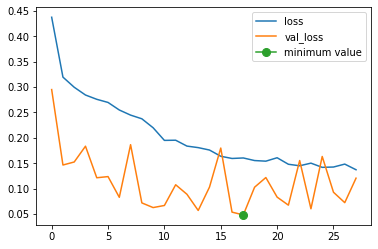

In [ ]:
# Plot nilai loss dan val_loss ketika proses training, dan titik val_loss terendahnya
pd.DataFrame(history.history).plot()
plt.plot(np.array(history.history['val_loss']).argmin(), np.array(history.history['val_loss']).min(), 
         marker='o', label='minimum value', markersize=8)
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Load model dengan val_loss terbaik dan disimpan ke variabel final_model
final_model = keras.models.load_model('/content/saved_models/weights-improve-18-0.04812.hdf5')
print('Loaded Successfully!')

Loaded Successfully!


In [ ]:
# Evaluasi model final pada data validasi
final_model.evaluate(val_generator)

14/14 [==============================] - 6s 4ms/step - loss: 0.0481


0.04812312498688698

Model final memperoleh loss sebesar 0.04812 pada data validasi. Nilai loss sudah cukup kecil sehingga akan digunakan model tersebut untuk forecasting.

### Make Dataframe of Mobilities Exact Values and Prediction Values on Training Set and Validation Set

Pada section ini kami membuat dataframe dengan kolom - kolom nilai eksak dan hasil prediksi model dari mobilitas pada data train dan validasi. Nantinya, dataframe tersebut akan digabungkan dengan hasil forecasting model pada data test sehingga dapat dilakukan plotting.

In [ ]:
# Membuat prediksi pada data train
prediction_train = []
for i in range(len(train_generator)):
  x, y = train_generator[i]
  prediction_train.append(final_model.predict(x))

# Melakukan inverse transform pada hasil prediksi data train
prediction_scaled_back_train = []
for i in prediction_train:
  prediction_scaled_back_train.append(scaler_pred.inverse_transform(i))

# Membuat prediksi pada data validasi
prediction_val = []
for i in range(len(val_generator)):
  x, y = val_generator[i]
  prediction_val.append(final_model.predict(x))

# Melakukan inverse transform pada hasil prediksi data validasi
prediction_scaled_back_val = []
for i in prediction_val:
  prediction_scaled_back_val.append(scaler_pred.inverse_transform(i))

# Menggabungkan hasil prediksi pada data train dan validasi yang sudah dilakukan inverse transform sehingga dapat dibuat menjadi dataframe
prediction_scaled_back = prediction_scaled_back_train.copy()

for i in prediction_scaled_back_val:
  prediction_scaled_back.append(i)

In [ ]:
pred_df = pd.DataFrame(np.array(prediction_scaled_back).reshape(-1,6), columns= 'PRED_' + covid_df_mob_train.columns[:6],
                       index=covid_df_mob_train.index[14:])

Pada code cell diatas, dibentuk dataframe dengan nilai - nilainya berupa hasil prediksi model pada data train dan data validasi. Kolom - kolom pada dataframe akan memiliki prefix, yaitu "PRED_"

In [ ]:
exact_df = pd.DataFrame(covid_df_mob_train.iloc[14:,:6].values, columns='EXACT_'+covid_df_mob_train.columns[:6],
                        index=covid_df_mob_train.index[14:])

Pada code cell diatas, dibentuk dataframe dengan nilai - nilainya berupa nilai eksak mobilitas yang ada pada data train dan data validasi. Kolom - kolom pada dataframe akan memiliki prefix, yaitu "EXACT_"

In [ ]:
# Menggabungkan (merge) dataframe hasil prediksi model dengan nilai eksak data train dan validasi
exact_pred_df = exact_df.merge(pred_df, how='inner', left_index=True, right_index=True)
exact_pred_df.head()

,EXACT_retail_and_recreation_percent_change_from_baseline,EXACT_grocery_and_pharmacy_percent_change_from_baseline,EXACT_parks_percent_change_from_baseline,EXACT_transit_stations_percent_change_from_baseline,EXACT_workplaces_percent_change_from_baseline,EXACT_residential_percent_change_from_baseline,PRED_retail_and_recreation_percent_change_from_baseline,PRED_grocery_and_pharmacy_percent_change_from_baseline,PRED_parks_percent_change_from_baseline,PRED_transit_stations_percent_change_from_baseline,PRED_workplaces_percent_change_from_baseline,PRED_residential_percent_change_from_baseline
Tanggal,,,,,,,,,,,,
2020-03-15,-20.0,3.0,-37.0,-19.0,5.0,4.0,-16.932388,1.292004,-28.411139,-23.290800,-7.315003,5.798786
2020-03-16,-18.0,-5.0,-23.0,-18.0,-10.0,7.0,-19.520622,-0.310768,-28.534870,-27.924486,-13.843558,8.114597
2020-03-17,-16.0,3.0,-23.0,-27.0,-15.0,8.0,-22.130693,-2.776092,-30.944838,-31.575752,-18.355875,10.047225
2020-03-18,-22.0,-3.0,-28.0,-32.0,-19.0,11.0,-25.391975,-5.780968,-34.904392,-35.498528,-21.075031,11.869509
2020-03-19,-28.0,-12.0,-33.0,-38.0,-21.0,12.0,-29.969706,-8.757235,-40.648575,-40.286713,-23.872250,13.838634


### Forecast Jakarta Mobility using Test Set

Pada section ini kami melakukan forecasting mobilitas Jakarta pada data test dengan model LSTM final. Forecasting dilakukan untuk tanggal 21 Juni 2022 hingga 27 Juni 2022 (pada saat pengerjaan, data mobilitas hanya sampai tanggal 20 Juni 2022). Selanjutnya, hasil forecasting tersebut kami bentuk menjadi dataframe, lalu digabungkan dengan dataframe exact_pred_df (dataframe nilai aktual dan hasil prediksi model pada data train dan data validasi). Terakhir, kami membuat plot untuk tiap mobilitas untuk membandingkan nilai eksak, nilai hasil prediksi model, dan nilai forecasting model pada data test.

Code cell dibawah berfungsi untuk model melakukan forecasting pada data test dari tanggal 21 Juni hingga 27 Juni 2022, lalu hasil forecasting disimpan pada sebuah list bernama "forecasting".

Ide algoritma dari code dibawah adalah sebagai berikut:
1. Pertama, f didefinisikan sebagai baris ke-14 pada data test yang berupa array 1 dimensi (yaitu, nilai - nilai mobilitas pada tanggal 20 Juni 2022)
2. Inisiasi list kosong bernama "forecasting"
3. Copy 13 baris awal dari data test (yaitu, nilai - nilai mobilitas dari tanggal 7 Juni hingga 19 Juni 2022) dan disimpan pada variabel current_batch_2d
4. Tambahkan data mobilitas tanggal 20 Juni 2022 pada baris akhir current_batch_2d
5. Ambil 14 baris terakhir dari current_batch_2d
6. Ubah nilai baris terakhir dari current_batch_2d menjadi nilai f
7. Ubah dimensi current_batch_2d menjadi 3 dimensi, lalu simpan pada variabel current_batch
8. Model memprediksi current_batch lalu hasil prediksi disimpan ke variabel f
9. Masukkan nilai f ke list forecasting
10. Ulangi langkah 4 sampai 9, dengan menambahkan data mobilitas tanggal 21 Juni 2022, 22 Juni 2022, ..., 26 Juni 2022 pada baris akhir current_batch_2d

Sehingga, diperoleh hasil forecasting tanggal 21 Juni hingga 27 Juni 2022 pada list "forecasting".

Pada langkah 7, current_batch_2d perlu diubah dimensinya karena model melakukan training pada batch berdimensi 3.

In [ ]:
f = test_scaled[13, :6].copy()
forecasting = []
current_batch_2d = test_scaled[:13].copy()
for i in range(13, len(test_scaled)):
  current_batch_2d = np.append(current_batch_2d, test_scaled[i].reshape(1,11), axis=0)
  if i !=13:
    current_batch_2d = current_batch_2d[1:]
  current_batch_2d[-1,:6] = f
  current_batch = current_batch_2d.reshape(1, 14, 11)
  f = final_model.predict(current_batch)
  forecasting.append(f)

In [ ]:
# Melakukan inverse transform dari hasil forecasting oleh model
forecasting_scaled_back = []
for i in forecasting:
  forecasting_scaled_back.append(scaler_pred.inverse_transform(i))

In [ ]:
# Membuat dataframe hasil forecasting dengan prefix "FORECAST_"
forecast_df = pd.DataFrame(np.array(forecasting_scaled_back).reshape(-1,6), columns='FORECAST_'+covid_df_mob_train.columns[:6])
forecast_df

,FORECAST_retail_and_recreation_percent_change_from_baseline,FORECAST_grocery_and_pharmacy_percent_change_from_baseline,FORECAST_parks_percent_change_from_baseline,FORECAST_transit_stations_percent_change_from_baseline,FORECAST_workplaces_percent_change_from_baseline,FORECAST_residential_percent_change_from_baseline
0,-13.574069,3.163677,-6.943268,-28.913151,-17.348528,9.871220
1,-13.201823,3.202718,-5.522812,-29.002953,-17.203005,9.892198
2,-11.932297,4.534930,-2.862603,-27.901152,-16.416573,9.753518
3,-10.572051,6.513495,-0.471535,-26.147001,-13.313578,9.326184
4,-9.897992,7.804048,-6.089360,-19.708593,-3.721001,5.713180
5,-10.067336,6.782974,-10.522781,-19.036062,-0.479203,5.170454
6,-13.679053,4.668892,-8.725574,-28.825771,-17.418015,9.993272


In [ ]:
# Mengubah index forecast_df menjadi bentuk tanggal dan tipe datanya datetime
forecast_df['Tanggal'] = ['2022-06-2{}'.format(i) for i in range(1,8)]
forecast_df['Tanggal'] = pd.to_datetime(forecast_df['Tanggal'])
forecast_df.set_index('Tanggal', inplace=True)
forecast_df

,FORECAST_retail_and_recreation_percent_change_from_baseline,FORECAST_grocery_and_pharmacy_percent_change_from_baseline,FORECAST_parks_percent_change_from_baseline,FORECAST_transit_stations_percent_change_from_baseline,FORECAST_workplaces_percent_change_from_baseline,FORECAST_residential_percent_change_from_baseline
Tanggal,,,,,,
2022-06-21,-13.574069,3.163677,-6.943268,-28.913151,-17.348528,9.871220
2022-06-22,-13.201823,3.202718,-5.522812,-29.002953,-17.203005,9.892198
2022-06-23,-11.932297,4.534930,-2.862603,-27.901152,-16.416573,9.753518
2022-06-24,-10.572051,6.513495,-0.471535,-26.147001,-13.313578,9.326184
2022-06-25,-9.897992,7.804048,-6.089360,-19.708593,-3.721001,5.713180
2022-06-26,-10.067336,6.782974,-10.522781,-19.036062,-0.479203,5.170454
2022-06-27,-13.679053,4.668892,-8.725574,-28.825771,-17.418015,9.993272


In [ ]:
# Menggabungkan exact_pred_df dan forecast_df berdasarkan indexnya, ini merupakan dataframe final
final_mob_forecast_df = pd.merge(exact_pred_df, forecast_df, how='outer', left_index=True, right_index=True)

# Melihat 3 baris awal dari dataframe final
final_mob_forecast_df.head(3)

,EXACT_retail_and_recreation_percent_change_from_baseline,EXACT_grocery_and_pharmacy_percent_change_from_baseline,EXACT_parks_percent_change_from_baseline,EXACT_transit_stations_percent_change_from_baseline,EXACT_workplaces_percent_change_from_baseline,EXACT_residential_percent_change_from_baseline,PRED_retail_and_recreation_percent_change_from_baseline,PRED_grocery_and_pharmacy_percent_change_from_baseline,PRED_parks_percent_change_from_baseline,PRED_transit_stations_percent_change_from_baseline,PRED_workplaces_percent_change_from_baseline,PRED_residential_percent_change_from_baseline,FORECAST_retail_and_recreation_percent_change_from_baseline,FORECAST_grocery_and_pharmacy_percent_change_from_baseline,FORECAST_parks_percent_change_from_baseline,FORECAST_transit_stations_percent_change_from_baseline,FORECAST_workplaces_percent_change_from_baseline,FORECAST_residential_percent_change_from_baseline
Tanggal,,,,,,,,,,,,,,,,,,
2020-03-15,-20.0,3.0,-37.0,-19.0,5.0,4.0,-16.932388,1.292004,-28.411139,-23.290800,-7.315003,5.798786,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-16,-18.0,-5.0,-23.0,-18.0,-10.0,7.0,-19.520622,-0.310768,-28.534870,-27.924486,-13.843558,8.114597,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,-16.0,3.0,-23.0,-27.0,-15.0,8.0,-22.130693,-2.776092,-30.944838,-31.575752,-18.355875,10.047225,NaN,NaN,NaN,NaN,NaN,NaN


Pada 3 baris awal dataframe final_mob_forecast_df, terlihat bahwa kolom dengan prefix FORECAST_ berupa NaN, karena forecasting tidak dilakukan pada tanggal tersebut.

In [ ]:
# Melihat 3 baris akhir dari dataframe final
final_mob_forecast_df.tail(3)

,EXACT_retail_and_recreation_percent_change_from_baseline,EXACT_grocery_and_pharmacy_percent_change_from_baseline,EXACT_parks_percent_change_from_baseline,EXACT_transit_stations_percent_change_from_baseline,EXACT_workplaces_percent_change_from_baseline,EXACT_residential_percent_change_from_baseline,PRED_retail_and_recreation_percent_change_from_baseline,PRED_grocery_and_pharmacy_percent_change_from_baseline,PRED_parks_percent_change_from_baseline,PRED_transit_stations_percent_change_from_baseline,PRED_workplaces_percent_change_from_baseline,PRED_residential_percent_change_from_baseline,FORECAST_retail_and_recreation_percent_change_from_baseline,FORECAST_grocery_and_pharmacy_percent_change_from_baseline,FORECAST_parks_percent_change_from_baseline,FORECAST_transit_stations_percent_change_from_baseline,FORECAST_workplaces_percent_change_from_baseline,FORECAST_residential_percent_change_from_baseline
Tanggal,,,,,,,,,,,,,,,,,,
2022-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.897992,7.804048,-6.089360,-19.708593,-3.721001,5.713180
2022-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.067336,6.782974,-10.522781,-19.036062,-0.479203,5.170454
2022-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.679053,4.668892,-8.725574,-28.825771,-17.418015,9.993272


Pada 3 baris akhir dataframe final_mob_forecast_df, terlihat bahwa kolom dengan prefix FORECAST_ sudah memiliki nilai, karena tanggal pada index merupakan tanggal untuk nilai forecasting. Sehingga, nilai - nilai pada kolom dengan prefix EXACT_ dan PRED_ bernilai NaN.

In [ ]:
# Slicing dataframe final dengan hanya mengambil nilai eksak, prediksi, dan forecast pada mobilitas yang bersesuaian

# Dataframe mobilitas perusahaan retail dan rekreasi
final_mob_forecast_retail_df = final_mob_forecast_df[['EXACT_retail_and_recreation_percent_change_from_baseline', 
                                                      'PRED_retail_and_recreation_percent_change_from_baseline', 
                                                      'FORECAST_retail_and_recreation_percent_change_from_baseline']]

# Dataframe mobilitas toko bahan makanan dan apotek
final_mob_forecast_grocery_df = final_mob_forecast_df[['EXACT_grocery_and_pharmacy_percent_change_from_baseline', 
                                                       'PRED_grocery_and_pharmacy_percent_change_from_baseline', 
                                                       'FORECAST_grocery_and_pharmacy_percent_change_from_baseline']]

# Dataframe mobilitas taman
final_mob_forecast_parks_df = final_mob_forecast_df[['EXACT_parks_percent_change_from_baseline', 
                                                     'PRED_parks_percent_change_from_baseline', 
                                                     'FORECAST_parks_percent_change_from_baseline']]

# Dataframe mobilitas pusat transportasi umum
final_mob_forecast_transit_df = final_mob_forecast_df[['EXACT_transit_stations_percent_change_from_baseline', 
                                                       'PRED_transit_stations_percent_change_from_baseline', 
                                                       'FORECAST_transit_stations_percent_change_from_baseline']]

# Dataframe mobilitas tempat kerja
final_mob_forecast_workplaces_df = final_mob_forecast_df[['EXACT_workplaces_percent_change_from_baseline', 
                                                          'PRED_workplaces_percent_change_from_baseline', 
                                                          'FORECAST_workplaces_percent_change_from_baseline']]

# Dataframe mobilitas area permukiman
final_mob_forecast_resident_df = final_mob_forecast_df[['EXACT_residential_percent_change_from_baseline', 
                                                        'PRED_residential_percent_change_from_baseline', 
                                                        'FORECAST_residential_percent_change_from_baseline']]

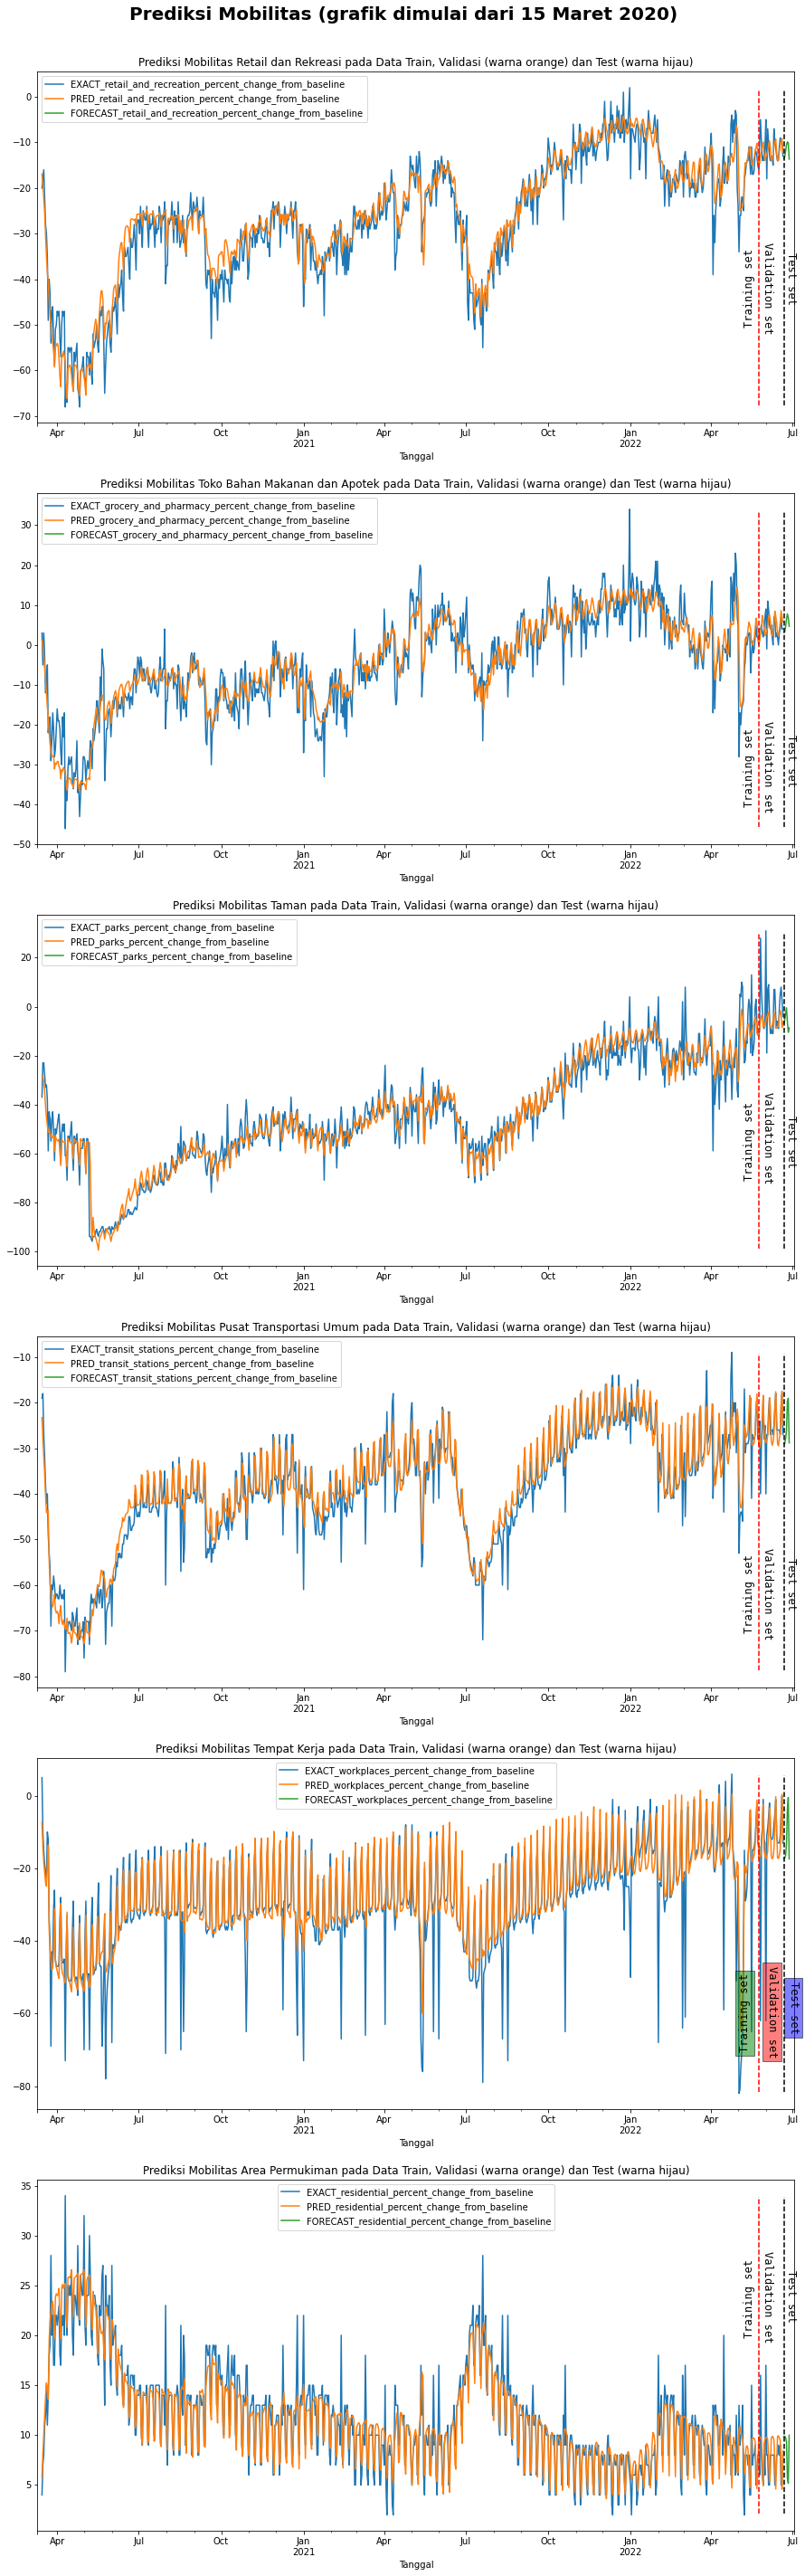

In [ ]:
""" 
Membuat plot nilai aktual, prediksi, dan hasil forecasting masing - masing
mobilitas dimulai dari tanggal 15 Maret 2020
"""

# Membuat figure dan axis plot
fig, axs = plt.subplots(6,1, figsize=(15,50))

# Plot berupa garis (line plot) nilai aktual, prediksi, dan hasil prediksi masing - masing mobilitas
final_mob_forecast_retail_df.plot(ax=axs[0])
final_mob_forecast_grocery_df.plot(ax=axs[1])
final_mob_forecast_parks_df.plot(ax=axs[2])
final_mob_forecast_transit_df.plot(ax=axs[3])
final_mob_forecast_workplaces_df.plot(ax=axs[4])
final_mob_forecast_resident_df.plot(ax=axs[5])

# Menambahkan garis vertikal untuk membuat batas data train, validasi, dan test, serta membuat limit sumbu x agar gambar tidak berhimpitan
for ax in axs:
  ax.axvline(pred_df.index[-28], color='red', ls='--', ymin = 0.05, ymax=0.95)
  ax.axvline(forecast_df.index[0], color='black', ls='--', ymin = 0.05, ymax=0.95)
  ax.set_xlim(datetime.date(2020,3,10), datetime.date(2022,7,3))

# Menambahkan informasi pada tiap garis vertikal pembatas di plot, serta membuat judul masing - masing subplot
axs[0].text(pred_df.index[-45], -50, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[0].text(pred_df.index[-25], -51.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[0].text(datetime.date(2022,6,22), -45, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[0].set_title('Prediksi Mobilitas Retail dan Rekreasi pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[1].text(pred_df.index[-45], -40, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[1].text(pred_df.index[-25], -41.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[1].text(datetime.date(2022,6,22), -35, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[1].set_title('Prediksi Mobilitas Toko Bahan Makanan dan Apotek pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[2].text(pred_df.index[-45], -70, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[2].text(pred_df.index[-25], -71.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[2].text(datetime.date(2022,6,22), -65, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[2].set_title('Prediksi Mobilitas Taman pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[3].text(pred_df.index[-45], -70, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[3].text(pred_df.index[-25], -71.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[3].text(datetime.date(2022,6,22), -65, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[3].set_title('Prediksi Mobilitas Pusat Transportasi Umum pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[4].text(pred_df.index[-50], -70, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace',
            bbox = dict(facecolor = 'green', alpha = 0.5))
axs[4].text(pred_df.index[-20], -71.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace',
            bbox = dict(facecolor = 'red', alpha = 0.5))
axs[4].text(datetime.date(2022,6,25), -65, 'Test set', rotation=270, fontsize='large', fontfamily='monospace',
            bbox = dict(facecolor = 'blue', alpha = 0.5))
axs[4].set_title('Prediksi Mobilitas Tempat Kerja pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[5].text(pred_df.index[-45], 20, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[5].text(pred_df.index[-25], 19.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[5].text(datetime.date(2022,6,22), 21.5, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[5].set_title('Prediksi Mobilitas Area Permukiman pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

# Membuat judul figure
fig.suptitle('Prediksi Mobilitas (grafik dimulai dari 15 Maret 2020)', x=0.5, y=0.9, fontsize=20, fontweight='bold')

# Menyimpan figure dengan format JPG
fig.savefig('prediksi mob 15 maret.jpg')

# Menampilkan plot
plt.show()

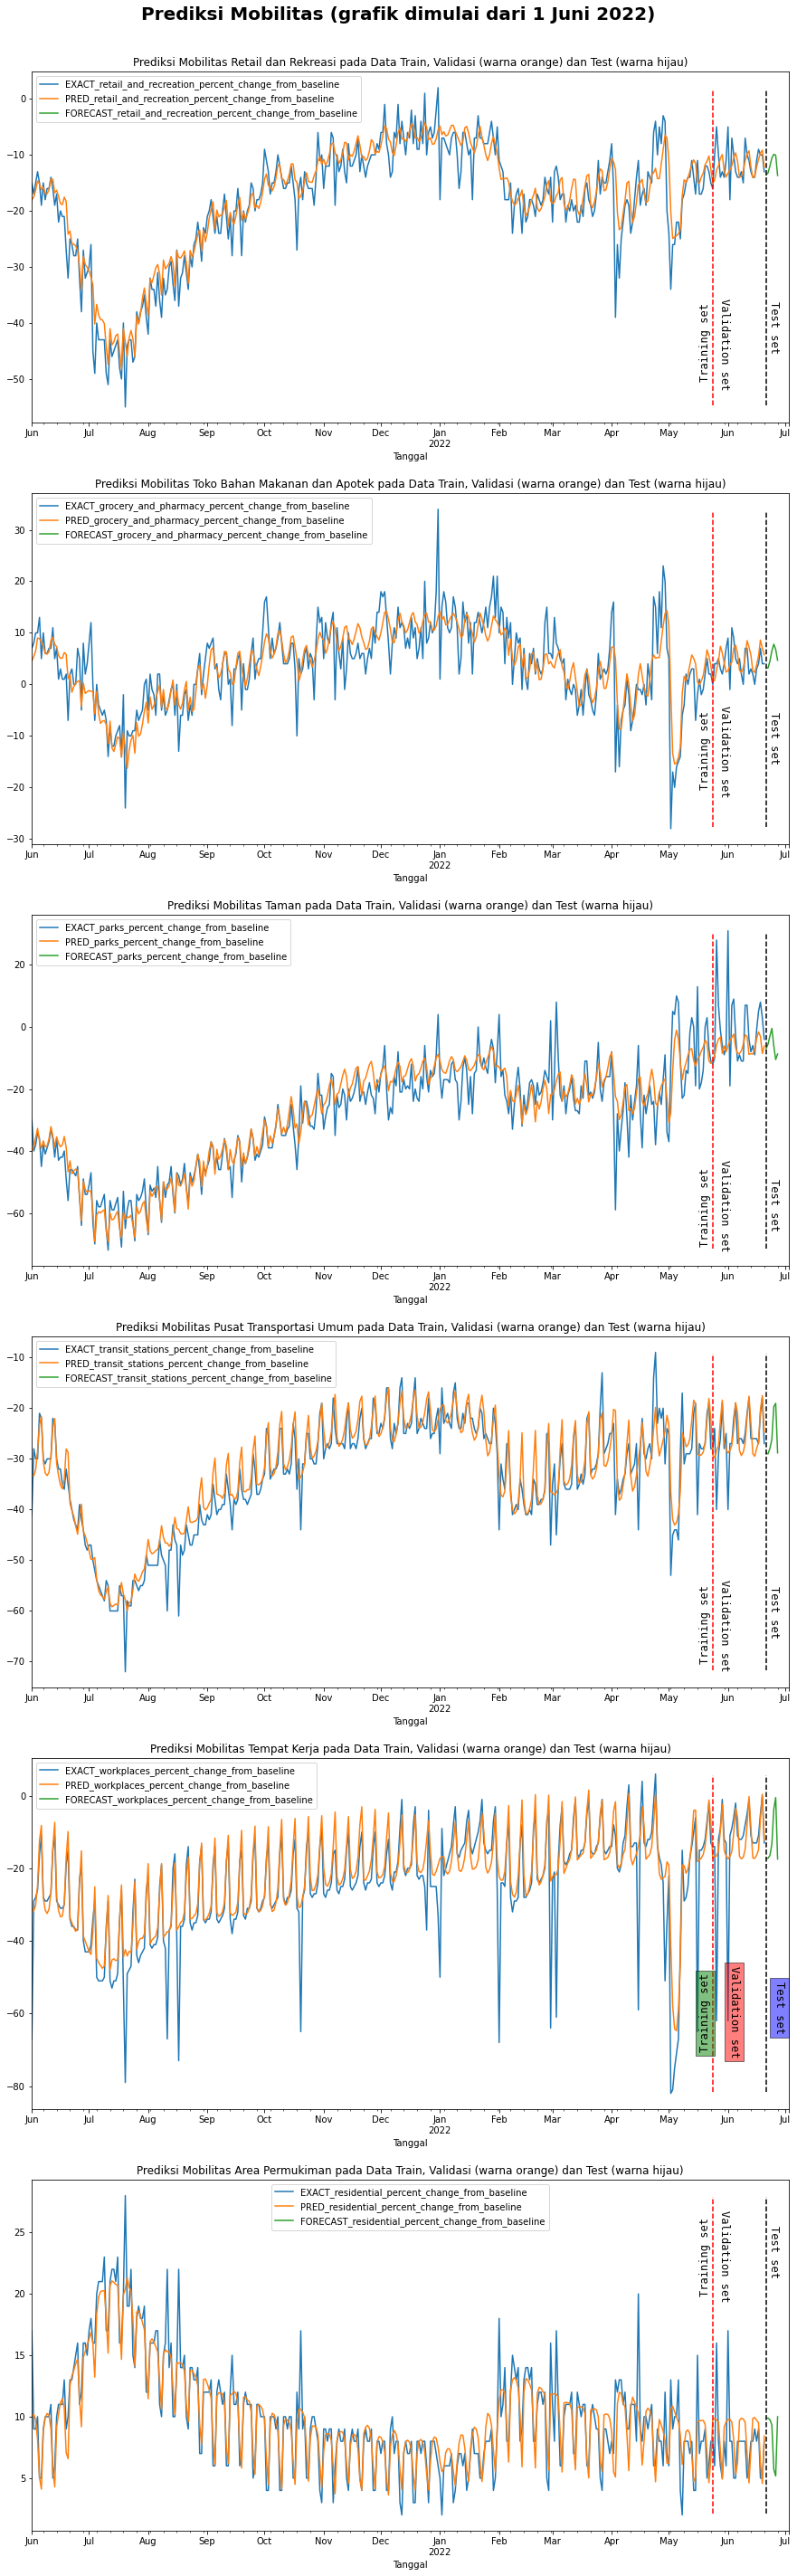

In [ ]:
""" 
Membuat plot nilai aktual, prediksi, dan hasil forecasting masing - masing
mobilitas dimulai dari tanggal 1 Juni 2022, agar hasil forecasting terlihat
lebih jelas
"""

# Membuat figure dan axis plot
fig, axs = plt.subplots(6,1, figsize=(15,50))

# Plot berupa garis (line plot) nilai aktual, prediksi, dan hasil prediksi masing - masing mobilitas dari tanggal 1 Juni 2022
final_mob_forecast_retail_df.loc[final_mob_forecast_retail_df.index>='2021-06-01',:].plot(ax=axs[0])
final_mob_forecast_grocery_df.loc[final_mob_forecast_grocery_df.index>='2021-06-01',:].plot(ax=axs[1])
final_mob_forecast_parks_df.loc[final_mob_forecast_parks_df.index>='2021-06-01',:].plot(ax=axs[2])
final_mob_forecast_transit_df.loc[final_mob_forecast_transit_df.index>='2021-06-01',:].plot(ax=axs[3])
final_mob_forecast_workplaces_df.loc[final_mob_forecast_workplaces_df.index>='2021-06-01',:].plot(ax=axs[4])
final_mob_forecast_resident_df.loc[final_mob_forecast_resident_df.index>='2021-06-01',:].plot(ax=axs[5])

# Menambahkan garis vertikal untuk membuat batas data train, validasi, dan test, serta membuat limit sumbu x agar gambar tidak berhimpitan
for ax in axs:
  ax.axvline(pred_df.index[-28], color='red', ls='--', ymin = 0.05, ymax=0.95)
  ax.axvline(forecast_df.index[0], color='black', ls='--', ymin = 0.05, ymax=0.95)
  ax.set_xlim(None, datetime.date(2022,7,3))

# Menambahkan informasi pada tiap garis vertikal pembatas di plot, serta membuat judul masing - masing subplot
axs[0].text(pred_df.index[-35], -50, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[0].text(pred_df.index[-25], -51.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[0].text(datetime.date(2022,6,22), -45, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[0].set_title('Prediksi Mobilitas Retail dan Rekreasi pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[1].text(pred_df.index[-35], -20, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[1].text(pred_df.index[-25], -21.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[1].text(datetime.date(2022,6,22), -15, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[1].set_title('Prediksi Mobilitas Toko Bahan Makanan dan Apotek pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[2].text(pred_df.index[-35], -70, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[2].text(pred_df.index[-25], -71.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[2].text(datetime.date(2022,6,22), -65, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[2].set_title('Prediksi Mobilitas Taman pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[3].text(pred_df.index[-35], -70, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[3].text(pred_df.index[-25], -71.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[3].text(datetime.date(2022,6,22), -65, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[3].set_title('Prediksi Mobilitas Pusat Transportasi Umum pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[4].text(pred_df.index[-35], -70, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace',
            bbox = dict(facecolor = 'green', alpha = 0.5))
axs[4].text(pred_df.index[-20], -71.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace',
            bbox = dict(facecolor = 'red', alpha = 0.5))
axs[4].text(datetime.date(2022,6,25), -65, 'Test set', rotation=270, fontsize='large', fontfamily='monospace',
            bbox = dict(facecolor = 'blue', alpha = 0.5))
axs[4].set_title('Prediksi Mobilitas Tempat Kerja pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

axs[5].text(pred_df.index[-35], 20, 'Training set', rotation='vertical', fontsize='large', fontfamily='monospace')
axs[5].text(pred_df.index[-25], 19.5, 'Validation set', rotation=270, fontsize='large', fontfamily='monospace')
axs[5].text(datetime.date(2022,6,22), 21.5, 'Test set', rotation=270, fontsize='large', fontfamily='monospace')
axs[5].set_title('Prediksi Mobilitas Area Permukiman pada Data Train, Validasi (warna orange) dan Test (warna hijau)')

# Membuat judul figure
fig.suptitle('Prediksi Mobilitas (grafik dimulai dari 1 Juni 2022)', x=0.5, y=0.9, fontsize=20, fontweight='bold')

# Menyimpan figure dengan format JPG
fig.savefig('prediksi mob 1 juni 2022.jpg')

# Menampilkan plot
plt.show()

**Observasi hasil prediksi dan forecasting model**:

Berdasarkan hasil plotting diatas, model terlihat cukup baik dalam membaca trend pada data train dan data validasi, ini menandakan bahwa model tidak mengalami overfitting dan fitur - fitur 'Meninggal', 'Sembuh', 'Total Pasien', 'Case Cure Rate', dan 'Persentasi Vaksinasi 2' yang berasal dari dataset Daily Update COVID-19 Jakarta, cukup berpengaruh terhadap keenam mobilitas yang dilakukan time series forecasting. Selain itu, hasil prediksi model juga menandakan bahwa terdapat korelasi antara keenam jenis mobilitas di Jakarta dengan mobilitas - mobilitas pada 14 hari sebelumnya, karena model memprediksi mobilitas hari ke $x$ dengan melihat pergerakan mobilitas dari 14 hari sebelumnya.

Berdasarkan plotting diatas, masih diperlukan lebih banyak data harian COVID-19 Jakarta untuk melakukan forecasting mobilitas, sehingga kesimpulan yang diambil dapat lebih logis. Namun, berdasarkan hasil forecasting, mobilitas di Jakarta pada tanggal 21 Juni hingga 27 Juni 2022 belum mengalami perubahan yang signifikan dibandingkan dengan beberapa hari sebelumnya. Hal ini dapat disebabkan karena kasus COVID yang dalam beberapa hari ini sedang mengalami peningkatan lagi, khususnya di Jakarta.

# Conclusion

---





*   Korelasi antara kasus harian COVID-19 dengan mobilitas masyarakat di Jakarta sangat kuat, karena jika kasus harian COVID terjadi lonjakan akibat gelombang virus varian baru maka sangat mempengaruhi mobilitas masyarakat, dimana mobilitas yang terjadi diluar rumah akan mengalami penurunan, sehingga masyarakat cenderung memilih untuk berada di rumah untuk menghindari penyebaran COVID yang masif.

*   Kuatnya korelasi antara kasus harian COVID-19 dengan mobilitas masyarakat di Jakarta juga didukung oleh hasil prediksi model time series forecasting, yang menunjukkan bahwa hasil prediksi model dapat membaca trend mobilitas Jakarta dengan baik berdasarkan data - data mobilitas harian sebelumnya dan data kasus harian COVID-19.

**Rekomendasi**:

Berdasarkan korelasi antara kasus harian COVID-19 dengan mobilitas masyarakat di Jakarta yang cukup kuat, maka untuk memperbaiki keadaan mobilitas kembali normal diharapkan kepada pemangku kebijakan dapat mengambil langkah yang dapat mempengaruhi penurunan COVID-19, diantaranya dengan menggencarkan vaksinasi dosis lengkap secara menyeluruh, menggencarkan sosialisasi protokol kesehatan, dan memperbaharui kebijakan mobilisasi di ruang publik dengan mempertimbangkan keadaan COVID-19.



# Daftar Pustaka

1. 	"Laporan Mobilitas Masyarakat Selama Pandemi COVID-19," Google, 20 June 2022. [Online]. Available: https://www.gstatic.com/covid19/mobility/2022-06-20_ID_Mobility_Report_id.pdf. [Accessed June 2022].

2. 	"Open Data Covid-19 Provinsi DKI Jakarta," Jakarta Satu, 26 June 2022. [Online]. Available: https://riwayat-file-covid-19-dki-jakarta-jakartagis.hub.arcgis.com/. [Accessed June 2022].

3. 	"Estimating mortality from COVID-19," World Health Organization, 4 August 2020. [Online]. Available: https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19. [Accessed June 2022].

4. 	C. Olah, "Understanding LSTM Networks," 27 August 2015. [Online]. Available: http://colah.github.io/posts/2015-08-Understanding-LSTMs/. [Accessed June 2022].

5. 	A. Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow : Concepts, Tools, and Techniques to Build Intelligent Systems, California: O’Reilly Media, Inc., 2019. 

6.  "Vaksin Booster Akan Jadi Syarat Perjalanan, Ini Informasinya," detikNews, 4 July 2022. [Online]. Available: https://news.detik.com/berita/d-6161492/vaksin-booster-akan-jadi-syarat-perjalanan-ini-informasinya. [Accessed July 2022].